# 🚗⚡ Charging Ahead: Socioeconomic Inequities in Electric Vehicle Charging Infrastructure Across the United States

Analysis of Electric Vehicle Charging Station Locations, Their Interconnections, and Their Relationship to Socioeconomic Status and Other Data.

URLs:

* EV Charging Data: https://driveelectric.gov/stations
* US Household Income per city: https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?select=Kaggle_deffs.pdf

Important Note:

* As of 2018, there are 19,495 incorporated cities, towns, and villages in the United States.
* 14,768 of these have populations below 5,000.

## 📚 Notebook Structure

- 🚀 **Charging Ahead: Socioeconomic Inequities in Electric Vehicle Charging Infrastructure Across the United States**
- 🚀 **1 - Data Preparation**
  - EV Charging CSV
  - Checking and Removing Empty Columns
  - Group by State and City
  - US Household Income
  - Group by State and City
  - Merge the Two Datasets
  - Checking Overlaps of (State, City)
  - Problem Fix
- 🚀 **2 - EDA - Combined Data**
  - 📊 Remove Outliers and Perform EDA Again
- 🚀 **3 - Analyze the Number of Stations Opened Over Time and Compare with Average Income**
  - 📊 Replace NaN Substring in Strings
- 🚀 **4 - Visualization of EV Charging Stations and Mean Income Across the USA**
  - State-Level Distribution of EV Charging Stations
  - Mean Household Income Per State
  - Geospatial Correlation Between EV Charging Stations and Household Income
  - Normalized EV Charging Stations by Population
  - Normalized EV Charging Stations by Land Area


In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1 - Data Preperation

### EV Charging CSV

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Miki/evc.csv")
df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
1,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,NaN,800-256-6219,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,False,NaN
3,ELEC,Galleria at Tyler,1299 Galleria at Tyler,NaN,Riverside,CA,92503,NaN,951-351-3110,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
4,ELEC,City of Pasadena - Holly Street Garage,150 E Holly St,NaN,Pasadena,CA,91103,NaN,626-744-7665,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN


In [ ]:
df.shape

(73725, 75)

In [ ]:
df.isnull().sum()

,0
Fuel Type Code,0
Station Name,1
Street Address,0
Intersection Directions,50539
City,5
...,...
CNG Station Sells Renewable Natural Gas,73725
LNG Station Sells Renewable Natural Gas,73725
Maximum Vehicle Class,63402
EV Workplace Charging,0


In [ ]:
df.duplicated().sum()

0

#### Checking and Removing Enpty Columns

In [ ]:
1# Identify columns with all empty values
empty_columns = df.columns[df.isnull().all()]

# Print the result
print("Columns that are completely empty:")
print(empty_columns)

Columns that are completely empty:
Index(['Plus4', 'BD Blends', 'NG Fill Type Code', 'NG PSI',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Intersection Directions (French)',
       'Access Days Time (French)', 'BD Blends (French)', 'Hydrogen Is Retail',
       'CNG Dispenser Num', 'CNG On-Site Renewable Source',
       'CNG Total Compression Capacity', 'CNG Storage Capacity',
       'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends',
       'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures',
       'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI',
       'CNG Vehicle Class', 'LNG Vehicle Class', 'RD Blends',
       'RD Blends (French)', 'RD Blended with Biodiesel',
       'RD Maximum Biodiesel Level', 'CNG Station Sells Renewable Natural Gas',
       'LNG Station Sells Renewable Natural Gas'],
      dtype='object')


In [ ]:
df_cleaned = df.dropna(axis=1, how='all')

In [ ]:
df_cleaned.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Station Phone,Status Code,Expected Date,...,Access Detail Code,Federal Agency Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,213-741-1151,E,NaN,...,NaN,NaN,PARKING_GARAGE,Free; parking fee,NaN,False,NaN,LD,False,NaN
1,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,E,NaN,...,NaN,NaN,HOSPITAL,Free; parking fee,NaN,False,NaN,NaN,False,NaN
2,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,800-256-6219,E,NaN,...,CALL,NaN,CAR_DEALER,NaN,NaN,True,NaN,MD,False,NaN
3,ELEC,Galleria at Tyler,1299 Galleria at Tyler,NaN,Riverside,CA,92503,951-351-3110,E,NaN,...,NaN,NaN,SHOPPING_MALL,Free,NaN,False,NaN,LD,False,NaN
4,ELEC,City of Pasadena - Holly Street Garage,150 E Holly St,NaN,Pasadena,CA,91103,626-744-7665,E,NaN,...,NaN,NaN,PARKING_GARAGE,Free,NaN,False,NaN,LD,False,NaN


In [ ]:
df_cleaned.shape

(73725, 43)

In [ ]:
df_cleaned.isnull().sum()

,0
Fuel Type Code,0
Station Name,1
Street Address,0
Intersection Directions,50539
City,5
State,0
ZIP,0
Station Phone,640
Status Code,0
Expected Date,68686


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73725 entries, 0 to 73724
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    73725 non-null  object 
 1   Station Name                      73724 non-null  object 
 2   Street Address                    73725 non-null  object 
 3   Intersection Directions           23186 non-null  object 
 4   City                              73720 non-null  object 
 5   State                             73725 non-null  object 
 6   ZIP                               73725 non-null  object 
 7   Station Phone                     73085 non-null  object 
 8   Status Code                       73725 non-null  object 
 9   Expected Date                     5039 non-null   object 
 10  Groups With Access Code           73725 non-null  object 
 11  Access Days Time                  67951 non-null  object 
 12  Card

In [ ]:
# Specify the columns you want to keep
columns_to_keep = [
     "ID", "Station Name", "Street Address",
    "City", "State", "ZIP", "Open Date"
]

# Select only the specified columns from df_cleaned
df_selected = df_cleaned[columns_to_keep]


In [ ]:
df_selected.head()

,ID,Station Name,Street Address,City,State,ZIP,Open Date
0,1523,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,1995-08-30
1,6355,Scripps Green Hospital,10666 N Torrey Pines Rd,La Jolla,CA,92037,1997-07-30
2,6405,Galpin Motors,15421 Roscoe Blvd,Sepulveda,CA,91343,2012-12-11
3,6425,Galleria at Tyler,1299 Galleria at Tyler,Riverside,CA,92503,1997-08-30
4,6505,City of Pasadena - Holly Street Garage,150 E Holly St,Pasadena,CA,91103,1997-08-30


In [ ]:
# Total entries in the "State" and "City" combination
total_zip_count = df_selected[['State', 'City']].shape[0]

# Unique entries in the "State" and "City" combination
unique_zip_count_before = df_selected[['State', 'City']].drop_duplicates().shape[0]

# Calculate non-unique entries by subtracting unique from total
non_unique_zip_count_before = total_zip_count - unique_zip_count_before

# Display the result
print("Number of unique ['State', 'City'] combinations:", unique_zip_count_before)
print("Number of non-unique ['State', 'City'] combinations:", non_unique_zip_count_before)


Number of unique ['State', 'City'] combinations: 8777
Number of non-unique ['State', 'City'] combinations: 64948


#### Group by State and City

aggregate other fields as lists


In [ ]:
df_selected_goruped = df_selected.groupby(['State', 'City']).agg({
    'ID': 'count',  # Count the number of stations per city
    'Station Name': lambda x: list(x.unique()),  # Collect unique station names in a list
    'Street Address': lambda x: list(x.unique()),  # Collect unique street addresses in a list
    'ZIP': lambda x: list(x.unique()),  # Collect unique ZIP codes in a list
    'Open Date': lambda x: list(x.unique())  # Collect unique open dates in a list
}).reset_index()

# Rename the count column to 'Station Count'
grouped_df_ev = df_selected_goruped.rename(columns={'ID': 'Station Count'})

In [ ]:
grouped_df_ev.head(10)

,State,City,Station Count,Station Name,Street Address,ZIP,Open Date
0,AK,Anchorage,13,"[JL Properties, Inc, CHUGACH NORTH STATION 1, ...","[11124 Old Seward Hwy, 1040 E 1st Ave, Dimond ...","[99515, 99501, 99514, 99517, 99503, 99515, 99518]","[2020-06-26, 2020-08-11, 2020-10-01, 2019-08-0..."
1,AK,Cantwell,1,[Jack River Properties Alaska],[Mile 209.9 George Parks Highway],[99729],[2022-06-11]
2,AK,Chugiak,1,"[Chugiak, AK - Tesla Supercharger]",[22211 Birchwood Loop Road],[99567],[2022-11-05]
3,AK,Cooper Landing,1,[18280 Sterling Hwy],[18280 Sterling Hwy],[99572],[2023-10-25]
4,AK,Cordova,2,"[Cordova Center - Upper, Cordova Center - Lower]","[604 1st St, 502 Railroad Ave]",[99574],[2017-12-21]
5,AK,Delta Junction,1,[ReCharge Alaska - Delta Junction],[265 Richardson Hwy],[99737],[2024-01-17]
6,AK,Denali National Park and Preserve,1,[ReCharge Alaska],[Mile 214.5 Parks Hwy],[99755],[2021-09-30]
7,AK,Douglas,1,[Treadwell Ice Arena],[105 Savikko Rd],[99801],[2018-11-15]
8,AK,Fairbanks,1,[Golden Valley Electric Fairbanks],[758 Illinois Street],[99701],[2021-11-03]
9,AK,GIRDWOOD,1,[VIP LOT CHARGER VIP LOT CHARGER],[1000 ARLBERG AVE],[99587],[2020-11-19]


In [ ]:
grouped_df_ev.shape

(8772, 7)

In [ ]:
grouped_df_ev["Station Count"].value_counts()

,count
Station Count,
1,3303
2,1462
3,841
4,559
5,365
...,...
761,1
326,1
1814,1


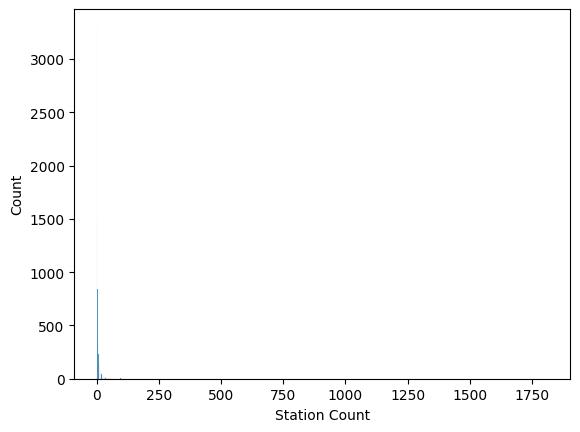

In [ ]:
sns.histplot(grouped_df_ev["Station Count"])
plt.show()

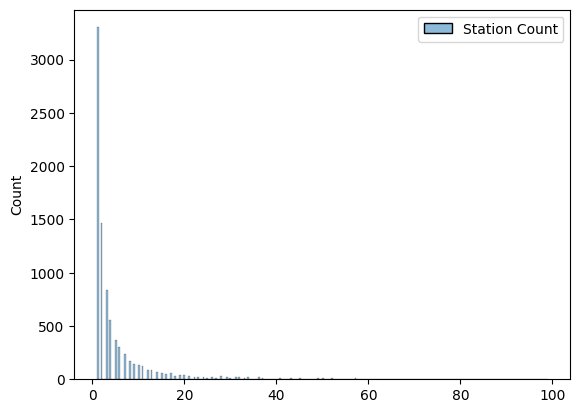

In [ ]:
sns.histplot(grouped_df_ev[grouped_df_ev["Station Count"] < 100])
plt.show()

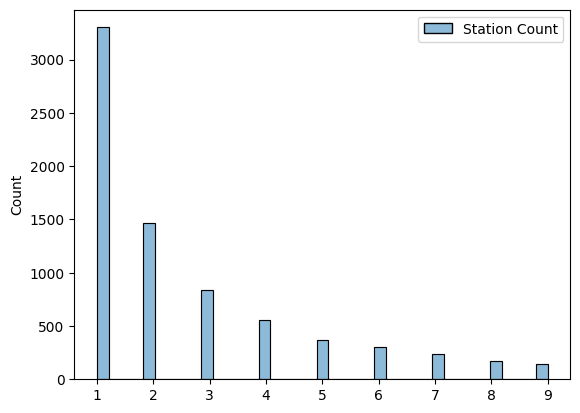

In [ ]:
sns.histplot(grouped_df_ev[grouped_df_ev["Station Count"] < 10])
plt.show()

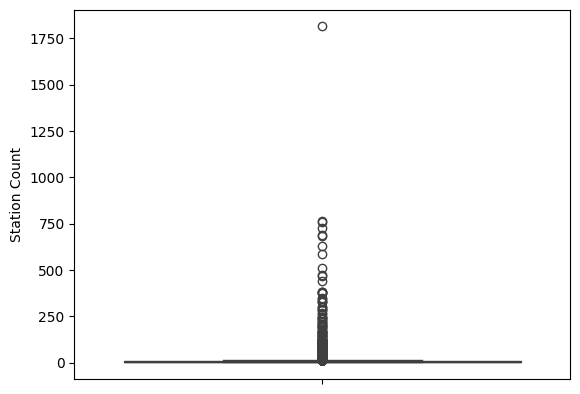

In [ ]:
sns.boxplot(grouped_df_ev["Station Count"])
plt.show()

In [ ]:
# Display the resulting DataFrame or save it to a new CSV file
grouped_df_ev.to_csv('/content/drive/MyDrive/Colab Notebooks/Miki/evc_cleaned.csv', index=False)

### US Household Income

In [ ]:
df_house = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Miki/us_income.csv",encoding='latin1')
df_house.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [ ]:
df_house.shape

(32526, 19)

In [ ]:
df_house.isnull().sum()

,0
id,0
State_Code,0
State_Name,0
State_ab,0
County,0
City,0
Place,0
Type,0
Primary,0
Zip_Code,0


In [ ]:
df_house.duplicated().sum()

0

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32526 entries, 0 to 32525
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32526 non-null  int64  
 1   State_Code  32526 non-null  int64  
 2   State_Name  32526 non-null  object 
 3   State_ab    32526 non-null  object 
 4   County      32526 non-null  object 
 5   City        32526 non-null  object 
 6   Place       32526 non-null  object 
 7   Type        32526 non-null  object 
 8   Primary     32526 non-null  object 
 9   Zip_Code    32526 non-null  int64  
 10  Area_Code   32526 non-null  object 
 11  ALand       32526 non-null  int64  
 12  AWater      32526 non-null  int64  
 13  Lat         32526 non-null  float64
 14  Lon         32526 non-null  float64
 15  Mean        32526 non-null  int64  
 16  Median      32526 non-null  int64  
 17  Stdev       32526 non-null  int64  
 18  sum_w       32526 non-null  float64
dtypes: float64(3), int64(8), 

In [ ]:
# Identify columns with all empty values
empty_columns = df_house.columns[df_house.isnull().all()]

# Print the result
print("Columns that are completely empty:")
print(empty_columns)

Columns that are completely empty:
Index([], dtype='object')


In [ ]:
df_house.rename(columns={'State_ab': 'State'}, inplace=True)

In [ ]:
# Total entries in the "State" and "City" combination
total_zip_count = df_house[['State', 'City']].shape[0]

# Unique entries in the "State" and "City" combination
unique_zip_count_before = df_house[['State', 'City']].drop_duplicates().shape[0]

# Calculate non-unique entries by subtracting unique from total
non_unique_zip_count_before = total_zip_count - unique_zip_count_before

# Display the result
print("Number of unique ['State', 'City'] combinations:", unique_zip_count_before)
print("Number of non-unique ['State', 'City'] combinations:", non_unique_zip_count_before)


Number of unique ['State', 'City'] combinations: 11228
Number of non-unique ['State', 'City'] combinations: 21298


In [ ]:
df_house.head()

,id,State_Code,State_Name,State,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


#### Group by State and City

Aggregate as specified

For handling the multi values for Cities in States that have records of different Places, I averaged the values - Mean, Medianm and Stevd

And as for ALand and AWater I summed them up



In [ ]:
df_house_grouped = df_house.groupby(['State', 'City']).agg({
    'County': lambda x: list(x.unique()),  # List unique counties
    'Place': lambda x: list(x.unique()),  # List unique places
    'Type': lambda x: list(x.unique()),  # List unique types
    'Primary': lambda x: list(x.unique()),  # List unique primary entries
    'Zip_Code': lambda x: list(x.unique()),  # List unique ZIP codes
    'Area_Code': lambda x: list(x.unique()),  # List unique area codes
    'ALand': 'sum',  # Sum ALand
    'AWater': 'sum',  # Sum AWater
    'Mean': 'mean',  # Average Mean income
    'Median': 'mean',  # Average Median income
    'Stdev': 'mean',  # Average Stdev
    'sum_w': 'sum'  # Sum sum_w
}).reset_index()

In [ ]:
df_house_grouped.head()

,State,City,County,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Mean,Median,Stdev,sum_w
0,AK,Alakanuk,[Kusilvak Census Area],[Alakanuk city],[City],[place],[99554],[907],76485032,26008972,40008.0,33347.00,32543.00,125.296256
1,AK,Allakaket,[Yukon-Koyukuk Census Area],[New Allakaket],[CDP],[place],[99720],[907],6350272,978129,33847.0,27223.00,21247.00,14.532835
2,AK,Anchorage,"[Matanuska-Susitna Borough, Aleutians East Bor...","[Point MacKenzie, Akutan city]","[CDP, Track]","[place, Track]","[99501, 99508, 99504, 99517, 99507, 99503, 995...",[907],597817212,283670760,89349.2,156128.44,55792.68,8544.513232
3,AK,Anderson,[Denali Borough],[Anderson city],[City],[place],[99744],[907],113285111,9169124,93374.0,300000.00,43837.00,26.531144
4,AK,Barrow,[North Slope Borough],[Barrow city],[City],[place],[99723],[907],48786920,6890236,94285.0,78124.00,70054.00,614.464934


In [ ]:
df_house_grouped.isnull().sum()

,0
State,0
City,0
County,0
Place,0
Type,0
Primary,0
Zip_Code,0
Area_Code,0
ALand,0
AWater,0


In [ ]:
df_house_grouped['ALand_normalized'] = (df_house_grouped['ALand'] - df_house_grouped['ALand'].min()) / (df_house_grouped['ALand'].max() - df_house_grouped['ALand'].min())
df_house_grouped['ALand_normalized'] *= 1000
df_house_grouped['AWater_normalized'] = (df_house_grouped['AWater'] - df_house_grouped['AWater'].min()) / (df_house_grouped['AWater'].max() - df_house_grouped['AWater'].min())
df_house_grouped['AWater_normalized'] *= 1000

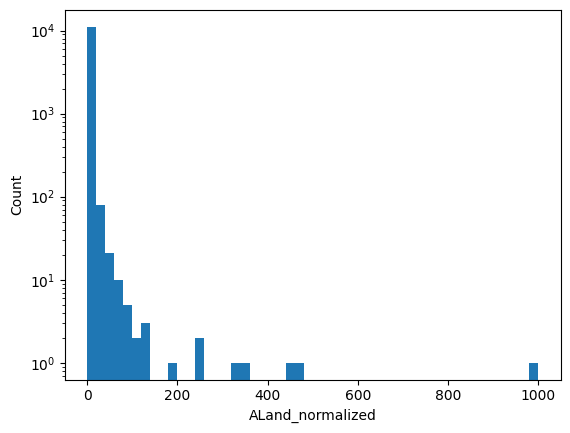

In [ ]:
# Plot histogram with a log scale on the X-axis
plt.hist(df_house_grouped['ALand_normalized'], bins=50, log=True)
plt.xlabel('ALand_normalized')
plt.ylabel('Count')
plt.show()

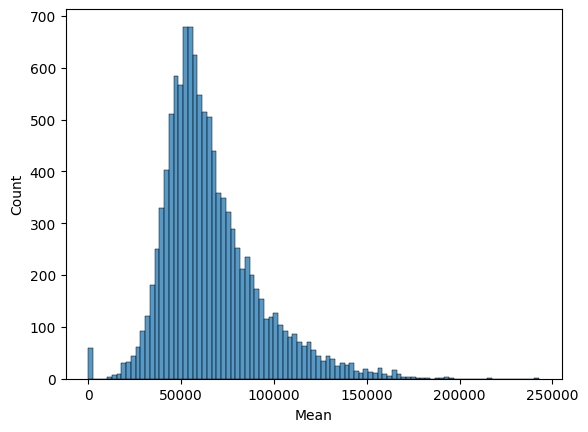

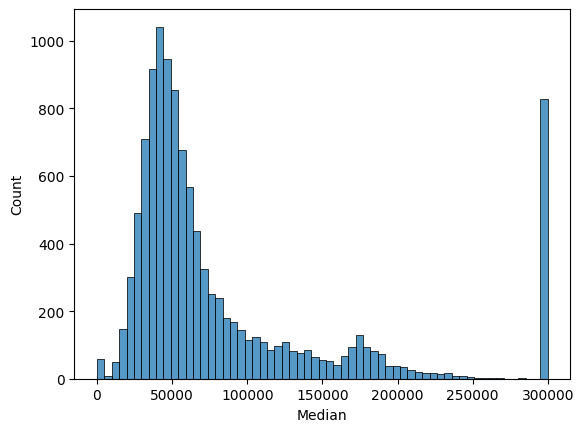

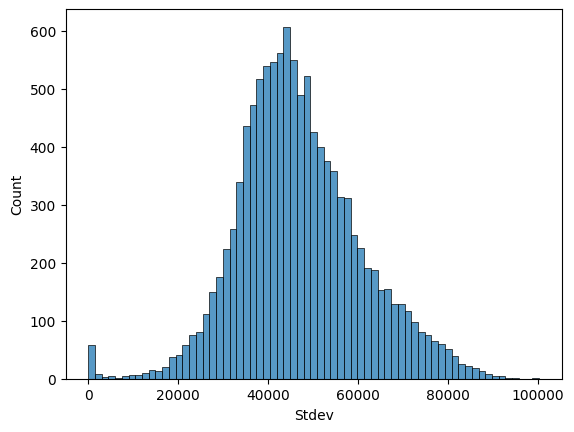

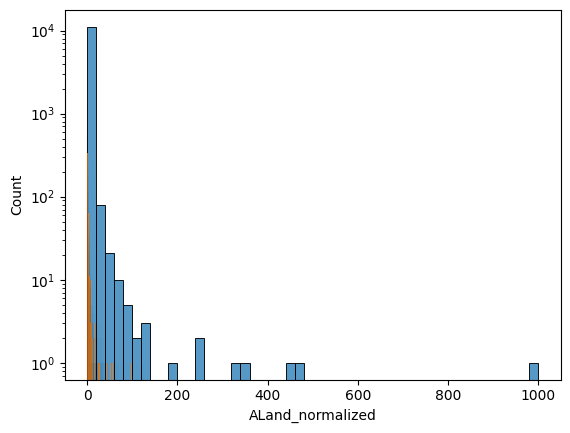

In [ ]:

df_eda = df_house_grouped[['Mean', 'Median', "Stdev", "ALand_normalized"]]
for i in df_eda.select_dtypes(include=['number']).columns:
    if i == "ALand_normalized":
      sns.histplot(df_house_grouped['ALand_normalized'], bins=50, log=True)
    sns.histplot(df_eda[i])
    plt.show()

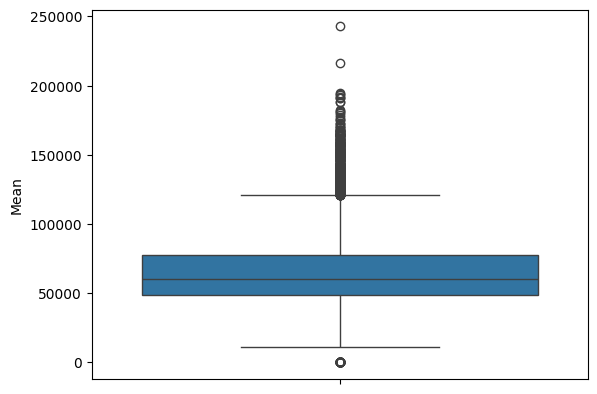

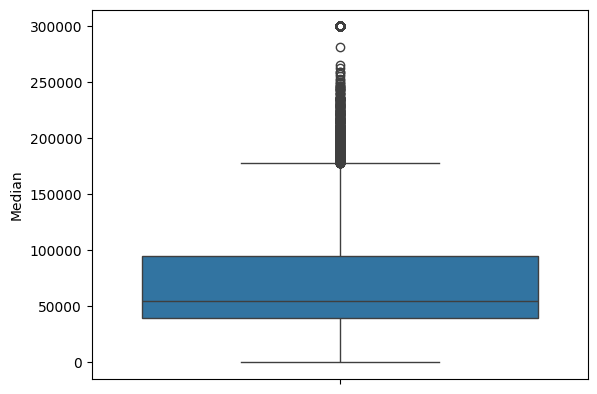

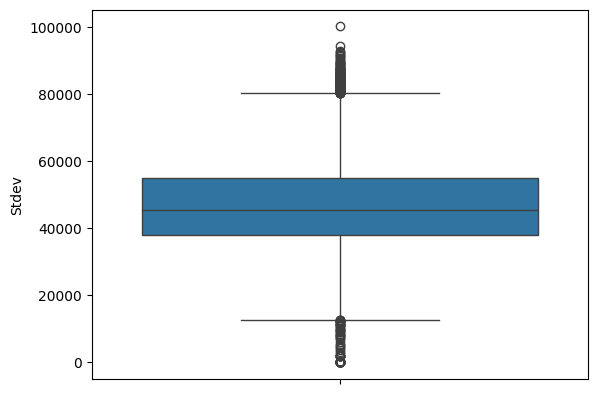

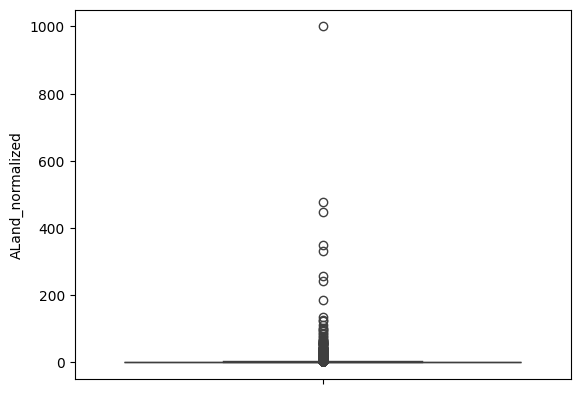

In [ ]:

df_eda = df_house_grouped[['Mean', 'Median', "Stdev", "ALand_normalized"]]
for i in df_eda.select_dtypes(include=['number']).columns:
    sns.boxplot(df_eda[i])
    plt.show()

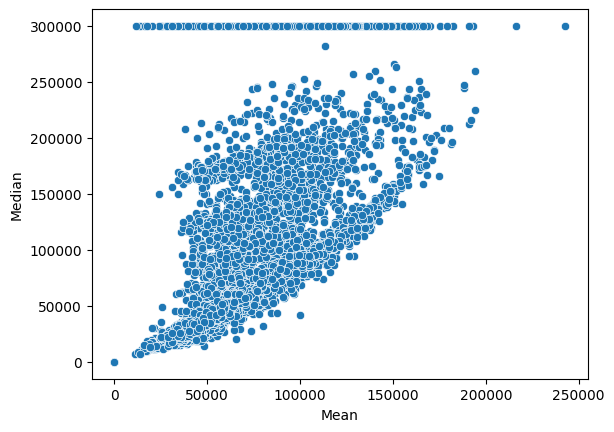

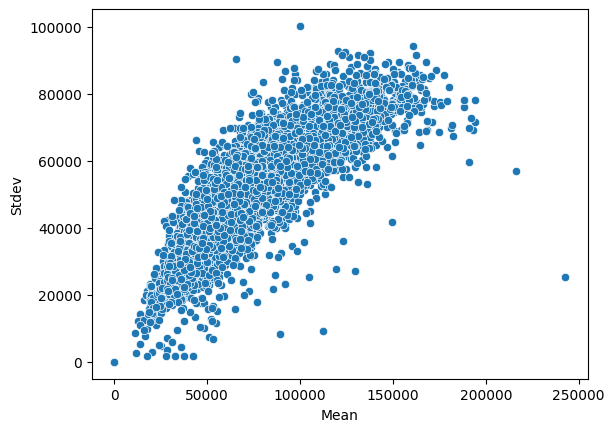

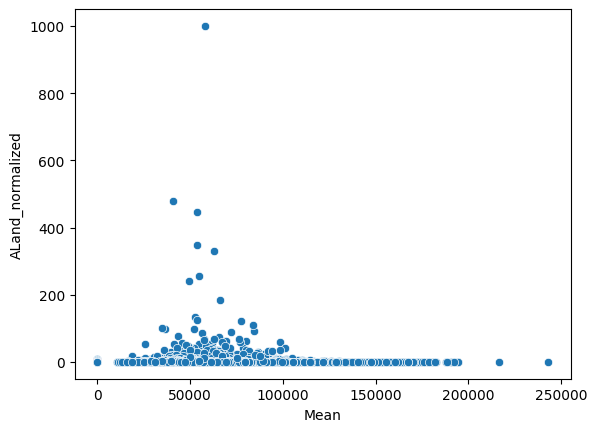

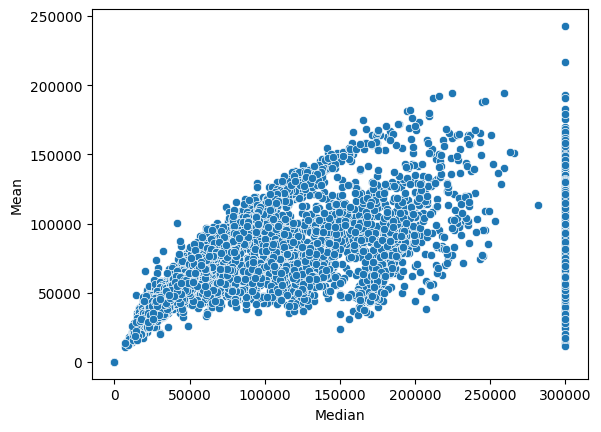

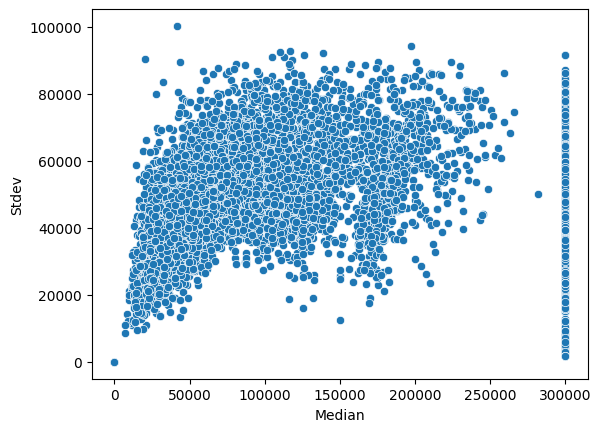

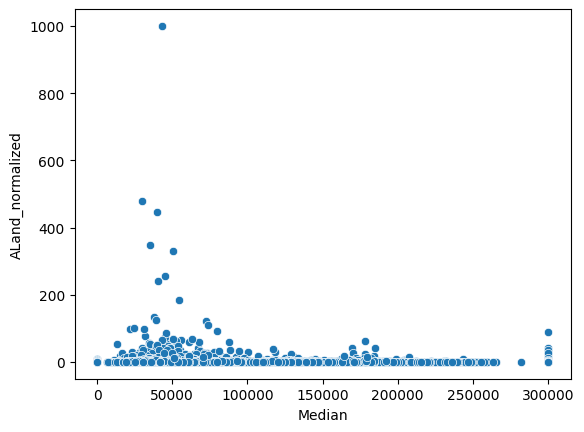

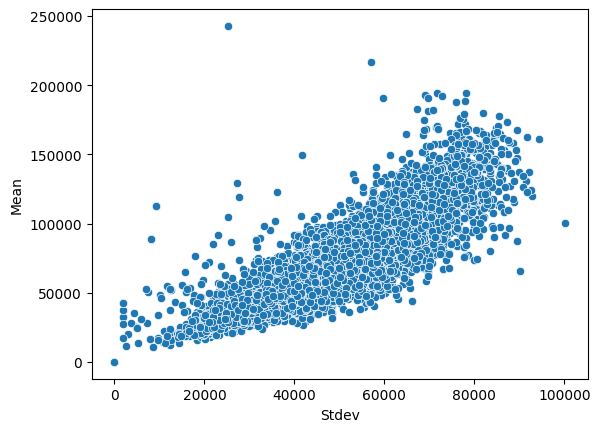

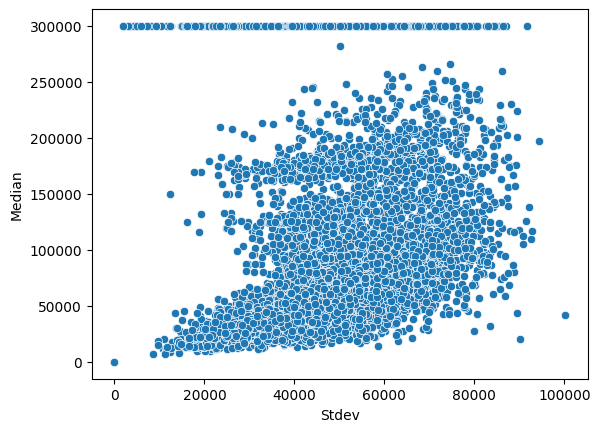

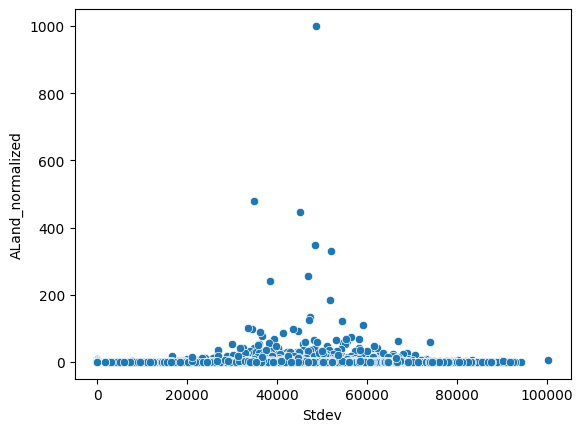

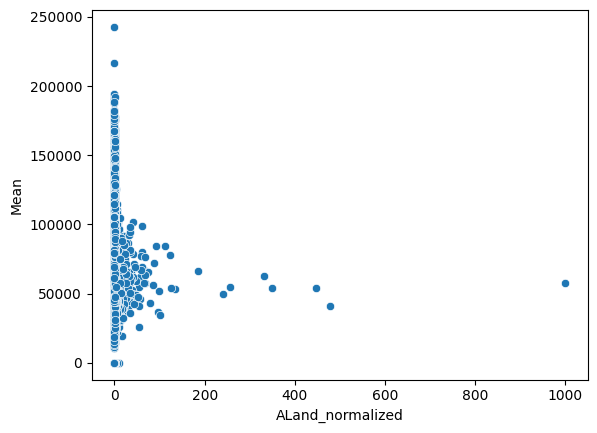

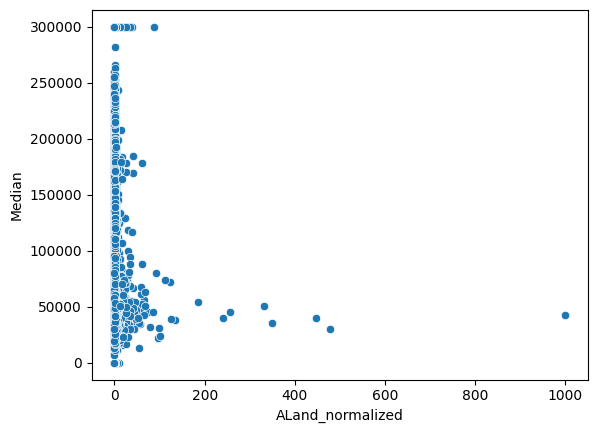

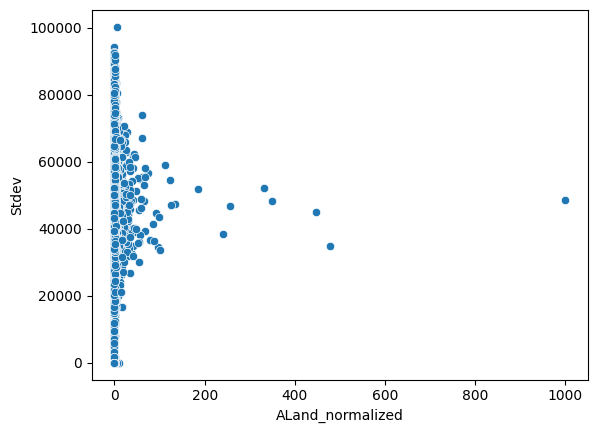

In [ ]:
df_eda = df_house_grouped[['Mean', 'Median', "Stdev", "ALand_normalized"]]
for i in df_eda.select_dtypes(include=['number']).columns:
  for j in df_eda.select_dtypes(include=['number']).columns:
    if i != j:
      sns.scatterplot(x=df_eda[i], y=df_eda[j])
      plt.show()

In [ ]:
df_house_grouped.to_csv('/content/drive/MyDrive/Colab Notebooks/Miki/us_income_cleaned.csv', index=False)

### Merge the two Datasets

#### Checking how many pairs we have overlaped of (State,City)

Meannig we have them in both DBs, and we can merge them based on this key

In [ ]:
def compare_state_city_overlap(df1, df2):
    # Extract unique (State, City) combinations from both files
    state_city_set1 = set(df1[['State', 'City']].dropna().apply(tuple, axis=1).unique())
    state_city_set2 = set(df2[['State', 'City']].dropna().apply(tuple, axis=1).unique())

    # Find overlap and differences
    overlap_count = len(state_city_set1 & state_city_set2)
    file1_unique_count = len(state_city_set1)
    file2_unique_count = len(state_city_set2)

    # Check coverage
    file1_covers_file2 = state_city_set2.issubset(state_city_set1)
    file2_covers_file1 = state_city_set1.issubset(state_city_set2)

    # Print results
    print(f"Number of overlapping (State, City) combinations: {overlap_count}")
    print(f"Unique (State, City) combinations in file1: {file1_unique_count}")
    print(f"Unique (State, City) combinations in file2: {file2_unique_count}")

    if file1_unique_count > file2_unique_count:
        print("File 1 has more unique (State, City) combinations.")
    elif file2_unique_count > file1_unique_count:
        print("File 2 has more unique (State, City) combinations.")
    else:
        print("Both files have the same number of unique (State, City) combinations.")

    if file1_covers_file2:
        print("File 1 covers all (State, City) combinations in File 2.")
    elif file2_covers_file1:
        print("File 2 covers all (State, City) combinations in File 1.")
    else:
        print("Neither file fully covers the (State, City) combinations of the other.")

    # Find and print some non-overlapping (State, City) combinations from file1
    unique_to_file1 = state_city_set1 - state_city_set2
    print("\nSome (State, City) combinations unique to File 1:")
    for item in list(unique_to_file1)[:10]:  # Print up to 10 unique entries
        print(item)
    return overlap_count


In [ ]:
compare_state_city_overlap(grouped_df_ev, df_house_grouped)

Number of overlapping (State, City) combinations: 5475
Unique (State, City) combinations in file1: 8772
Unique (State, City) combinations in file2: 11228
File 2 has more unique (State, City) combinations.
Neither file fully covers the (State, City) combinations of the other.

Some (State, City) combinations unique to File 1:
('MO', 'Asbury')
('CA', 'West Bishop')
('NC', 'Belville')
('OH', 'Norwich')
('WA', 'Liberty Lake')
('NY', 'Cortlandt Manor')
('MI', 'Harbor Springs')
('NY', 'Scottsville')
('TX', 'Clifton')
('NE', 'Thedford')


5475

#### Problem Fix

There is a problem that some of the cities with the same name have different names in the DBs

To fix that we can use the following script genereted using GPT-4o


* Comprehensive List of Replacements: A dictionary covers common city name variations and their standardized forms to ensure consistency (e.g., "Saint Louis" → "St. Louis").

* Lowercasing for Uniformity: Converts all city names to lowercase to avoid mismatches due to case differences.

* Rule-Based Substitutions: Applies general rules with regex patterns to handle common terms like "saint," "mount," "fort," and directional words (e.g., "North" → "N").

* Final Cleanup: Removes extra spaces and periods for a clean, standardized output.








In [ ]:
import re


# Static replacements for known city name variations
replacements = {
    "North Highlands": "North Highland",
    "Boiling Springs": "Boiling Spring",
    "De Kalb Junction": "DeKalb Junction",
    "N. Las Vegas": "N Las Vegas",
    "Hollidaysburg": "Holidaysburg",
    "Saint Cloud": "St. Cloud",
    "Saint George": "St. George",
    "Mount Vernon": "Mt. Vernon",
    "Saint Paul": "St. Paul",
    "Saint Louis": "St. Louis",
    "Saint Petersburg": "St. Petersburg",
    "Fort Worth": "Ft. Worth",
    "New York City": "New York",
    "Los Angeles": "L.A.",
    "San Francisco": "S.F.",
    "Santa Monica": "Santa Mon.",
    "Lake Buena Vista": "Lake Buena",
    "West Palm Beach": "W Palm Beach",
    "Virginia Beach": "VA Beach",
    "Las Vegas": "LV",
    "Saint Augustine": "St. Augustine",
    "Saint Charles": "St. Charles",
    "Saint Joseph": "St. Joseph",
    "Saint Johns": "St. Johns",
    "Saint Marys": "St. Marys",
    "Fort Lauderdale": "Ft. Lauderdale",
    "Fort Myers": "Ft. Myers",
    "Jacksonville Beach": "Jax Beach",
    "Panama City Beach": "PCB",
    "Cape Coral": "Cape C.",
    "West Hollywood": "W. Hollywood",
    "Oklahoma City": "OKC",
    "Kansas City": "KC",
    "Corpus Christi": "Corpus",
    "Port Saint Lucie": "Port St. Lucie",
    "Saint Clair Shores": "St. Clair Shores",
    "Baton Rouge": "B.R.",
    "Palm Springs": "Palm Spr.",
    "Grand Rapids": "G.R.",
    "Little Rock": "L.R.",
    "Nashville": "Nash",
    "Minneapolis": "Mpls",
    "Cincinnati": "Cincy",
    "Greensboro": "G'boro",
    "Chattanooga": "Chatt",
    "South Lake Tahoe": "S. Lake Tahoe",
    "Long Beach": "L.B.",
    "Indianapolis": "Indy",
    "Huntington Beach": "Hunt. Beach",
    "El Paso": "ElP",
    "San Diego": "S.D.",
    "Salt Lake City": "S.L.C.",
    "New Orleans": "NOLA",
    "Anchorage": "Anch.",
    "Charlotte": "CLT",
    "Memphis": "MEM",
    "Raleigh": "RAL",
    "Columbus": "COL",
    "Tampa": "TPA",
    "San Antonio": "S.A.",
    "Fort Collins": "Ft. Collins",
    "Virginia Beach": "VA Beach",
    "San Jose": "SJ",
    "Bakersfield": "Bfield",
    "Santa Barbara": "S. Barbara",
    "Santa Cruz": "S. Cruz",
    "Santa Clarita": "S. Clarita",
    "Ventura": "Ven.",
    "Monterey": "Mont.",
    "Riverside": "Rside",
    "Buffalo": "Buff.",
    "Rochester": "Roch.",
    "Albany": "Alb.",
    "Schenectady": "Schen.",
    "Mount Pleasant": "Mt. Pleasant",
    "Rock Hill": "R. Hill",
    "Sioux Falls": "S. Falls",
    "Grand Prairie": "G. Prairie",
    "College Station": "C. Station",
    "Frisco": "Fris.",
    "Arlington": "Arling.",
    "Brownsville": "Brownsv.",
    "Corpus Christi": "Corpus",
    "Laredo": "Ldo",
    "Shreveport": "Shrev.",
    "Birmingham": "Bham",
    "Madison": "Mdsn.",
    "Des Moines": "D.M.",
    "Green Bay": "G. Bay",
    "Newark": "Nwk",
    "Jersey City": "J. City",
    "Atlantic City": "Atl. City",
    "Paterson": "Pat.",
    "Bridgeport": "Bpt.",
    "Hartford": "Hfd.",
    "Stamford": "Stam.",
    "Waterbury": "Wbury",
    "Fort Wayne": "Ft. Wayne",
    "South Bend": "S. Bend",
    "Evansville": "Evansv.",
    "Akron": "Akr.",
    "Toledo": "Tol.",
    "Cleveland": "Cleve.",
    "Dayton": "Dtn.",
    "Pittsburgh": "Pgh.",
    "Scranton": "Scr.",
    "Reading": "Rdng.",
    "Allentown": "A-town",
    "Erie": "E.",
    "Providence": "Prov.",
    "Worcester": "Worc.",
    "Fall River": "F. River",
    "Springfield": "Sprfd.",
    "Manchester": "Mchstr.",
    "Nashua": "Nsh.",
    "Dover": "Dvr.",
    "Burlington": "Burl.",
    "Anchorage": "Anch.",
    "Honolulu": "Hnl.",
    "Kailua": "Kail.",
    "Hilo": "Hi.",
    "San Bernardino": "San Bern.",
    "Santa Ana": "S. Ana",
    "Bakersfield": "B-field",
    "Sacramento": "Sac.",
    "Des Moines": "D. Moines",
    "Wichita Falls": "W. Falls",
    "Fountain Valley": "Ftn. Valley",
    "Palm Desert": "P. Desert",
    "Lake Havasu City": "Lake Havasu",
    "Gainesville": "G-ville",
    "Pensacola": "Pensac.",
    "Greenville": "G-ville",
    "Naperville": "Naperv.",
    "Chapel Hill": "C. Hill",
    "Newport Beach": "Newport B.",
    "Sierra Vista": "S. Vista",
    "Park City": "P. City",
    "Omaha": "Omah.",
    "Knoxville": "Knox.",
    "Myrtle Beach": "M. Beach",
    "Greenwich": "G-wich",
    "Fayetteville": "F-ville",
    "Santa Rosa": "S. Rosa",
    "Alexandria": "Alex.",
    "Chesapeake": "Chesp.",
    "Murfreesboro": "Murph.",
    "Clarksville": "Clarks.",
    "Chattanooga": "Chatta.",
    "Littleton": "Litton",
    "Rockville": "R-ville",
    "Springfield": "Sprngfld",
    "Charleston": "Chas.",
    "Clearwater": "Clrwtr",
    "Ann Arbor": "Ann A.",
    "Grand Rapids": "G. Rapids",
    "Rapid City": "R. City",
    "Sioux Falls": "Sioux F.",
    "Salt Lake City": "SLC",
    "Colorado Springs": "Colo. Spgs",
    "Fort Collins": "Ft. Collins",
    "College Station": "C. Station",
    "Corpus Christi": "C. Christi",
    "Santa Cruz": "S. Cruz",
    "Thousand Oaks": "Thsd. Oaks",
    "East Lansing": "E. Lansing",
    "Fort Lauderdale": "Ft. Laud.",
    "Kansas City": "K. City",
    "New Orleans": "N. Orleans",
    "Virginia Beach": "VA Beach",
    "Huntington Beach": "Hunt. Beach"
}

replacements = {k.lower(): v.lower() for k, v in replacements.items()}


def standardize_city_name(city_name):
    # Normalize input to lowercase for consistent matching
    city_name = city_name.lower()

    # Apply static replacements
    standardized_name = replacements.get(city_name, city_name)
    # Apply pattern-based replacements with case insensitivity
    standardized_name = re.sub(r"\bsaint\b", "st.", standardized_name, flags=re.IGNORECASE)  # Saint -> St.
    standardized_name = re.sub(r"\bmount\b", "mt.", standardized_name, flags=re.IGNORECASE)   # Mount -> Mt.
    standardized_name = re.sub(r"\bfort\b", "ft.", standardized_name, flags=re.IGNORECASE)    # Fort -> Ft.
    standardized_name = re.sub(r"\bnorth\b", "n", standardized_name, flags=re.IGNORECASE)     # North -> N
    standardized_name = re.sub(r"\bsouth\b", "s", standardized_name, flags=re.IGNORECASE)     # South -> S
    standardized_name = re.sub(r"\beast\b", "e", standardized_name, flags=re.IGNORECASE)      # East -> E
    standardized_name = re.sub(r"\bwest\b", "w", standardized_name, flags=re.IGNORECASE)      # West -> W
    standardized_name = re.sub(r"\bcity\b", "", standardized_name, flags=re.IGNORECASE)       # Remove "City" if redundant

    # Clean up any extra whitespace and remove periods
    standardized_name = re.sub(r"\.", "", standardized_name).strip()
    standardized_name = re.sub(r"\s+", " ", standardized_name)  # Remove extra spaces

    # Return lowercase for consistent merging
    return standardized_name

In [ ]:
# Apply the standardization function to the City column in both datasets
df_house_grouped['City_standardized'] = df_house_grouped['City'].apply(standardize_city_name)
grouped_df_ev['City_standardized'] = grouped_df_ev['City'].apply(standardize_city_name)

# Now you can use 'City_standardized' and 'State' columns to merge the datasets
# For example:
merged_df = pd.merge(df_house_grouped, grouped_df_ev, on=['State', 'City_standardized'], how='inner')

In [ ]:
Number_of_overlapping = compare_state_city_overlap(grouped_df_ev, df_house_grouped)

Number of overlapping (State, City) combinations: 5475
Unique (State, City) combinations in file1: 8772
Unique (State, City) combinations in file2: 11228
File 2 has more unique (State, City) combinations.
Neither file fully covers the (State, City) combinations of the other.

Some (State, City) combinations unique to File 1:
('MO', 'Asbury')
('CA', 'West Bishop')
('NC', 'Belville')
('OH', 'Norwich')
('WA', 'Liberty Lake')
('NY', 'Cortlandt Manor')
('MI', 'Harbor Springs')
('NY', 'Scottsville')
('TX', 'Clifton')
('NE', 'Thedford')


In [ ]:
merged_df.head()

,State,City_x,County,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,...,sum_w,ALand_normalized,AWater_normalized,City_standardized,City_y,Station Count,Station Name,Street Address,ZIP,Open Date
0,AK,Anchorage,"[Matanuska-Susitna Borough, Aleutians East Bor...","[Point MacKenzie, Akutan city]","[CDP, Track]","[place, Track]","[99501, 99508, 99504, 99517, 99507, 99503, 995...",[907],597817212,283670760,...,8544.513232,3.262022,11.563165,anch,Anchorage,13,"[JL Properties, Inc, CHUGACH NORTH STATION 1, ...","[11124 Old Seward Hwy, 1040 E 1st Ave, Dimond ...","[99515, 99501, 99514, 99517, 99503, 99515, 99518]","[2020-06-26, 2020-08-11, 2020-10-01, 2019-08-0..."
1,AK,Chugiak,[Aleutians East Borough],[Akutan city],[Track],[Track],[99567],[907],168793575,15079525,...,72.760740,0.921031,0.614681,chugiak,Chugiak,1,"[Chugiak, AK - Tesla Supercharger]",[22211 Birchwood Loop Road],[99567],[2022-11-05]
2,AK,Delta Junction,[Southeast Fairbanks Census Area],[Whitestone],[CDP],[place],[99737],[907],18298887,0,...,0.866493,0.099849,0.000000,delta junction,Delta Junction,1,[ReCharge Alaska - Delta Junction],[265 Richardson Hwy],[99737],[2024-01-17]
3,AK,Fairbanks,"[Fairbanks North Star Borough, Aleutians East ...","[Goldstream, Akutan city]","[CDP, Track]","[place, Track]","[99709, 99701]",[907],11211476204,51065945,...,3230.884702,61.176034,2.081582,fairbanks,Fairbanks,1,[Golden Valley Electric Fairbanks],[758 Illinois Street],[99701],[2021-11-03]
4,AK,Girdwood,[Aleutians East Borough],[Akutan city],[Track],[Track],[99587],[907],1404917227,154085085,...,100.227205,7.666008,6.280913,girdwood,GIRDWOOD,1,[VIP LOT CHARGER VIP LOT CHARGER],[1000 ARLBERG AVE],[99587],[2020-11-19]


In [ ]:
print("We managed to save " + str(merged_df.shape[0] - Number_of_overlapping) + " rows")

We managed to save 464 rows


In [ ]:
# Specify the desired column order
column_order = [
    'State', 'City_standardized', 'City_x', 'City_y', 'County', 'Place', 'Type', 'Primary',
    'Zip_Code', 'ZIP', 'Area_Code','Station Count', 'Station Name', 'Street Address', 'Open Date',
    'ALand', 'AWater', 'Mean', 'Median', 'Stdev', 'sum_w',

]

# Rearrange the columns in the specified order
merged_df = merged_df[column_order]

# Display the rearranged DataFrame head
merged_df.head()


,State,City_standardized,City_x,City_y,County,Place,Type,Primary,Zip_Code,ZIP,...,Station Count,Station Name,Street Address,Open Date,ALand,AWater,Mean,Median,Stdev,sum_w
0,AK,anch,Anchorage,Anchorage,"[Matanuska-Susitna Borough, Aleutians East Bor...","[Point MacKenzie, Akutan city]","[CDP, Track]","[place, Track]","[99501, 99508, 99504, 99517, 99507, 99503, 995...","[99515, 99501, 99514, 99517, 99503, 99515, 99518]",...,13,"[JL Properties, Inc, CHUGACH NORTH STATION 1, ...","[11124 Old Seward Hwy, 1040 E 1st Ave, Dimond ...","[2020-06-26, 2020-08-11, 2020-10-01, 2019-08-0...",597817212,283670760,89349.20,156128.440,55792.680,8544.513232
1,AK,chugiak,Chugiak,Chugiak,[Aleutians East Borough],[Akutan city],[Track],[Track],[99567],[99567],...,1,"[Chugiak, AK - Tesla Supercharger]",[22211 Birchwood Loop Road],[2022-11-05],168793575,15079525,133300.00,300000.000,60207.000,72.760740
2,AK,delta junction,Delta Junction,Delta Junction,[Southeast Fairbanks Census Area],[Whitestone],[CDP],[place],[99737],[99737],...,1,[ReCharge Alaska - Delta Junction],[265 Richardson Hwy],[2024-01-17],18298887,0,242857.00,300000.000,25317.000,0.866493
3,AK,fairbanks,Fairbanks,Fairbanks,"[Fairbanks North Star Borough, Aleutians East ...","[Goldstream, Akutan city]","[CDP, Track]","[place, Track]","[99709, 99701]",[99701],...,1,[Golden Valley Electric Fairbanks],[758 Illinois Street],[2021-11-03],11211476204,51065945,79965.25,177972.125,55464.125,3230.884702
4,AK,girdwood,Girdwood,GIRDWOOD,[Aleutians East Borough],[Akutan city],[Track],[Track],[99587],[99587],...,1,[VIP LOT CHARGER VIP LOT CHARGER],[1000 ARLBERG AVE],[2020-11-19],1404917227,154085085,94928.00,300000.000,65593.000,100.227205


In [ ]:
# Check for NaN values
nan_counts = merged_df.isnull().sum()

# Check for zero values
zero_counts = (merged_df == 0).sum()

# Display both results
print("NaN Counts:")
print(nan_counts)
print("\nZero Counts:")
print(zero_counts)

NaN Counts:
State                0
City_standardized    0
City_x               0
City_y               0
County               0
Place                0
Type                 0
Primary              0
Zip_Code             0
ZIP                  0
Area_Code            0
Station Count        0
Station Name         0
Street Address       0
Open Date            0
ALand                0
AWater               0
Mean                 0
Median               0
Stdev                0
sum_w                0
dtype: int64

Zero Counts:
State                  0
City_standardized      0
City_x                 0
City_y                 0
County                 0
Place                  0
Type                   0
Primary                0
Zip_Code               0
ZIP                    0
Area_Code              0
Station Count          0
Station Name           0
Street Address         0
Open Date              0
ALand                  6
AWater               705
Mean                  22
Median                22
Std

In [ ]:
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Miki/evc_income_merged.csv', index=False)

# 2 - EDA - Combined Data

In [142]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Miki/evc_income_merged.csv")
df.head()

,State,City_standardized,City_x,City_y,County,Place,Type,Primary,Zip_Code,ZIP,...,Station Count,Station Name,Street Address,Open Date,ALand,AWater,Mean,Median,Stdev,sum_w
0,AK,anch,Anchorage,Anchorage,"['Matanuska-Susitna Borough', 'Aleutians East ...","['Point MacKenzie', 'Akutan city']","['CDP', 'Track']","['place', 'Track']","[99501, 99508, 99504, 99517, 99507, 99503, 995...","[99515, 99501, 99514, 99517, 99503, '99515', 9...",...,13,"['JL Properties, Inc', 'CHUGACH NORTH STATION ...","['11124 Old Seward Hwy', '1040 E 1st Ave', 'Di...","['2020-06-26', '2020-08-11', '2020-10-01', '20...",597817212,283670760,89349.20,156128.440,55792.680,8544.513232
1,AK,chugiak,Chugiak,Chugiak,['Aleutians East Borough'],['Akutan city'],['Track'],['Track'],[99567],['99567'],...,1,"['Chugiak, AK - Tesla Supercharger']",['22211 Birchwood Loop Road'],['2022-11-05'],168793575,15079525,133300.00,300000.000,60207.000,72.760740
2,AK,delta junction,Delta Junction,Delta Junction,['Southeast Fairbanks Census Area'],['Whitestone'],['CDP'],['place'],[99737],[99737],...,1,['ReCharge Alaska - Delta Junction'],['265 Richardson Hwy'],['2024-01-17'],18298887,0,242857.00,300000.000,25317.000,0.866493
3,AK,fairbanks,Fairbanks,Fairbanks,"['Fairbanks North Star Borough', 'Aleutians Ea...","['Goldstream', 'Akutan city']","['CDP', 'Track']","['place', 'Track']","[99709, 99701]",[99701],...,1,['Golden Valley Electric Fairbanks'],['758 Illinois Street'],['2021-11-03'],11211476204,51065945,79965.25,177972.125,55464.125,3230.884702
4,AK,girdwood,Girdwood,GIRDWOOD,['Aleutians East Borough'],['Akutan city'],['Track'],['Track'],[99587],[99587],...,1,['VIP LOT CHARGER VIP LOT CHARGER'],['1000 ARLBERG AVE'],['2020-11-19'],1404917227,154085085,94928.00,300000.000,65593.000,100.227205


In [143]:
l = ["Mean", "Median", "Stdev", "ALand", "AWater"]
l2 = l.copy()
for col in l:
    df[col + "_norm"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    l2.append(col + "_norm")

l2.sort()

for col in l2:
    print("Corelation of number of stations with " + col + "\t" +  str(df["Station Count"].corr(df[col])))
    print("Covariance of number of stations with " + col + "\t" +  str(df["Station Count"].cov(df[col])))

    print()


In [144]:
# Calculating correlations and covariances with "Station Count" for only normalized columns
results = {"Column": [], "Correlation": [], "Covariance": []}
for col in l2:
    if "_norm" in col:  # Filter for columns with "_norm" in the name
        results["Column"].append(col)
        results["Correlation"].append(df["Station Count"].corr(df[col]))
        results["Covariance"].append(df["Station Count"].cov(df[col]))

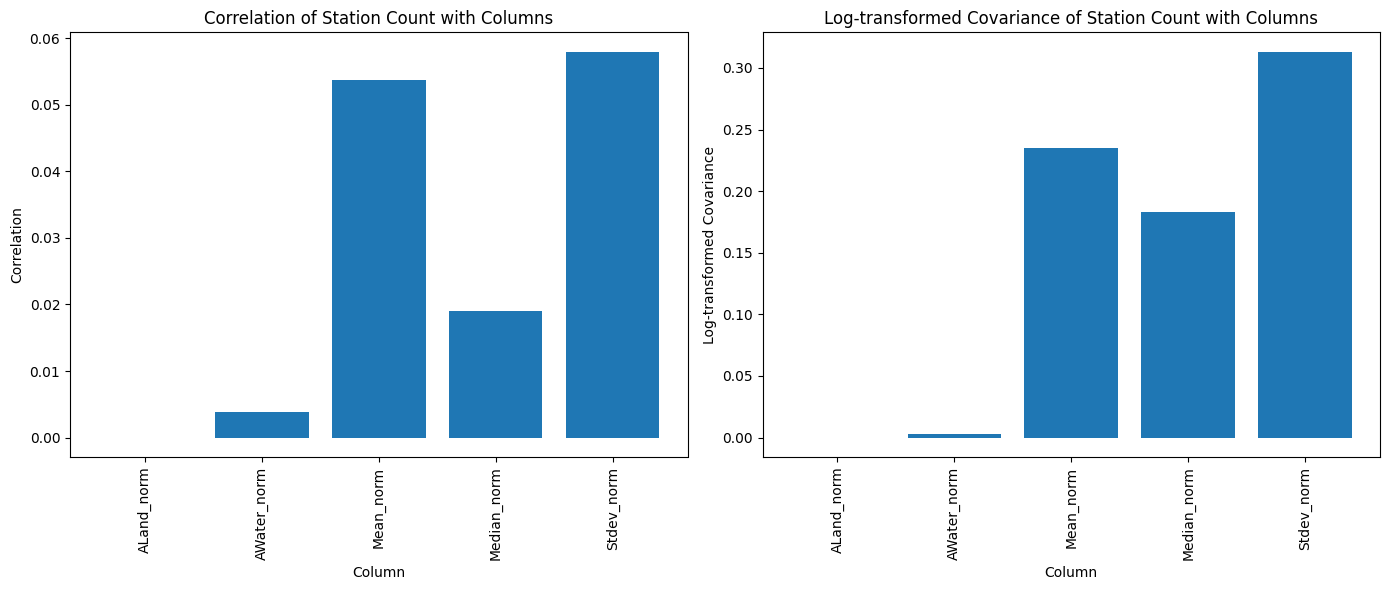

In [145]:
# Creating DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Applying log transformation to covariance values for better visualization
results_df["Covariance_log"] = np.log1p(results_df["Covariance"])  # log(1 + x) to handle zero/negative covariances

# Displaying the results as a table for easier comparison
# import ace_tools as tools; tools.display_dataframe_to_user(name="Correlation and Covariance Results", dataframe=results_df)

# Plotting correlations and log-transformed covariances for visual interpretation
plt.figure(figsize=(14, 6))

# Plotting correlation
plt.subplot(1, 2, 1)
plt.bar(results_df["Column"], results_df["Correlation"])
plt.xticks(rotation=90)
plt.title("Correlation of Station Count with Columns")
plt.xlabel("Column")
plt.ylabel("Correlation")

# Plotting log-transformed covariance
plt.subplot(1, 2, 2)
plt.bar(results_df["Column"], results_df["Covariance_log"])
plt.xticks(rotation=90)
plt.title("Log-transformed Covariance of Station Count with Columns")
plt.xlabel("Column")
plt.ylabel("Log-transformed Covariance")

plt.tight_layout()
plt.show()

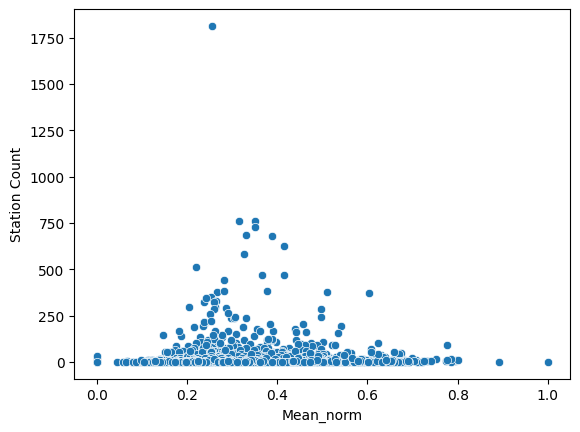

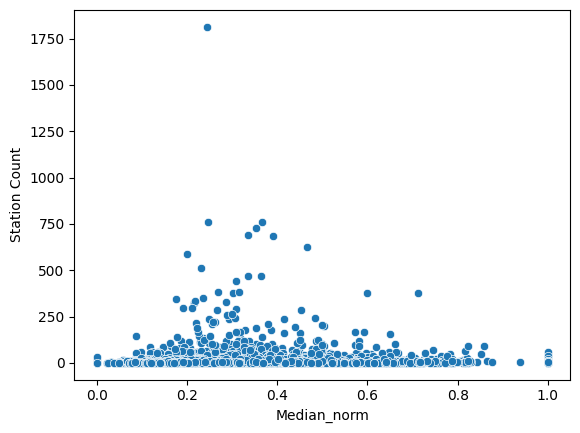

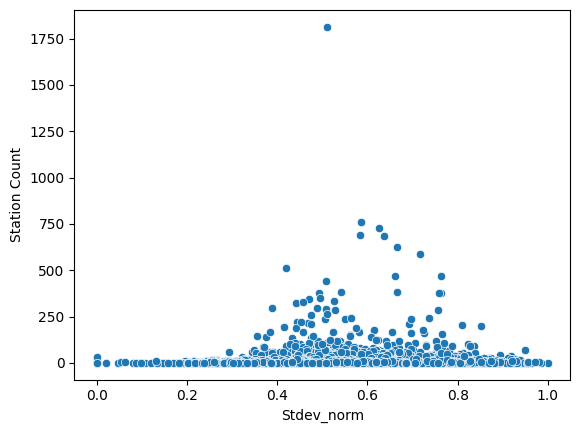

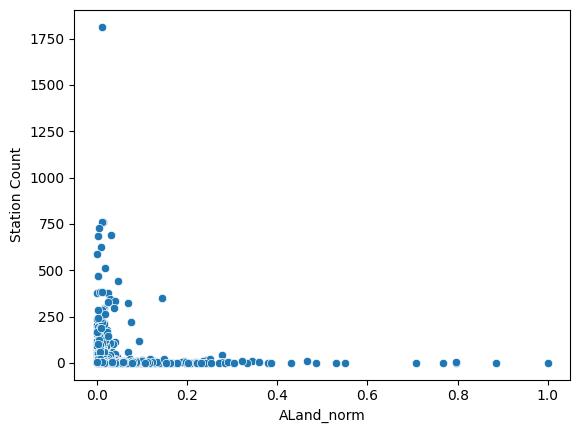

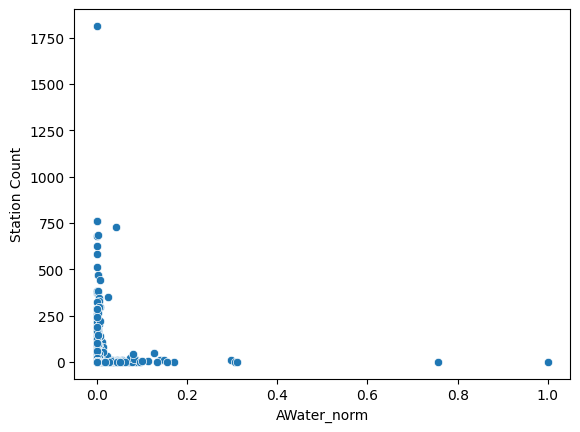

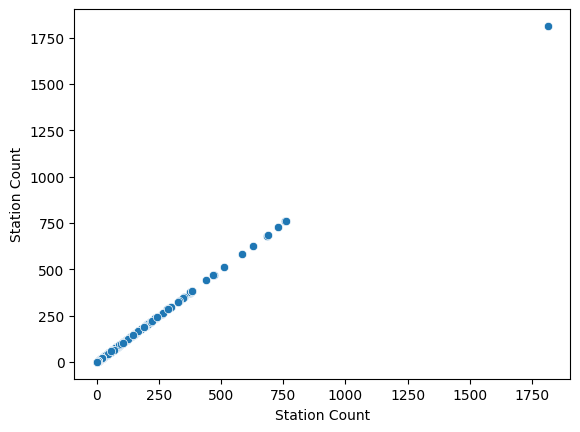

In [146]:
df_check = df[['Mean_norm', 'Median_norm', "Stdev_norm","ALand_norm", "AWater_norm","Station Count"]]
for i in df_check.select_dtypes(include=['number']).columns:
    sns.scatterplot(x=df_check[i], y=df_check["Station Count"])
    plt.show()

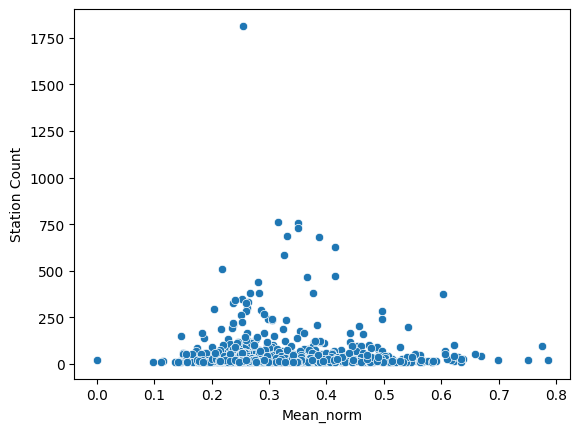

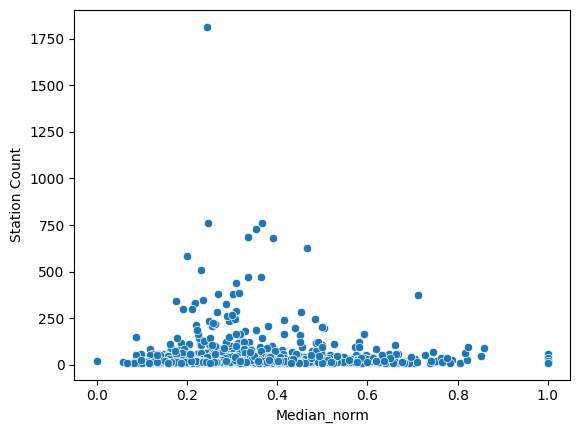

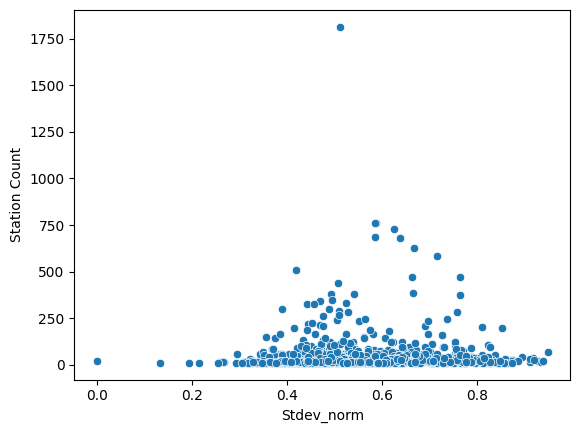

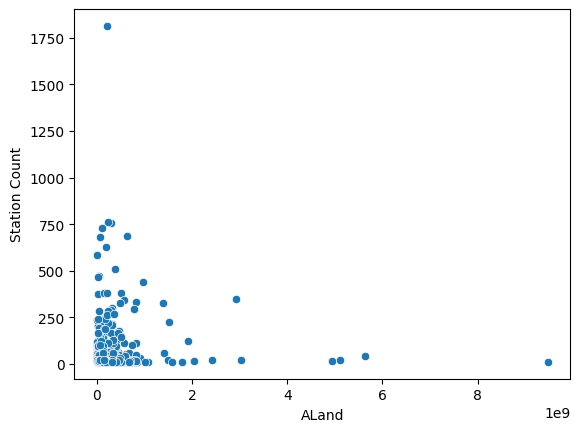

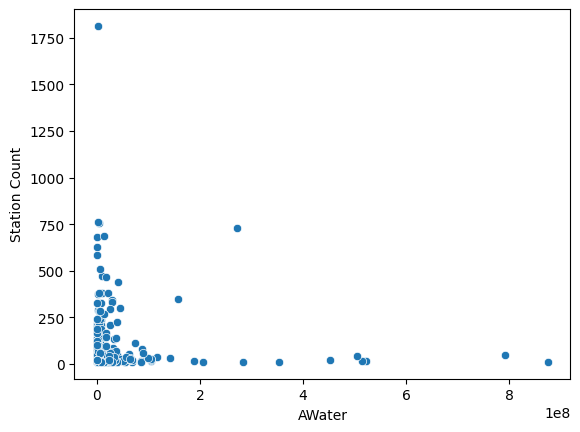

In [147]:
df_check = df[['Mean_norm', 'Median_norm', "Stdev_norm", "ALand", "AWater", "Station Count"]]

df_check_filtered = df_check[df_check["Station Count"] > 10]
df_check_filtered = df_check_filtered[df_check["ALand"] > 0.5]
df_check_filtered = df_check_filtered[df_check["AWater"] > 0.5]

for i in df_check_filtered.select_dtypes(include=['number']).columns.drop("Station Count"):
    sns.scatterplot(x=df_check_filtered[i], y=df_check_filtered["Station Count"])
    plt.xlabel(i)
    plt.ylabel("Station Count")
    plt.show()

<Axes: >

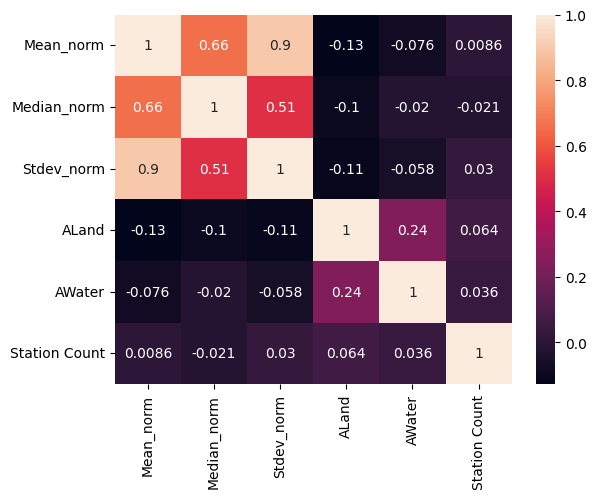

In [148]:
sns.heatmap(df_check_filtered.select_dtypes(include=['number']).corr(), annot=True)

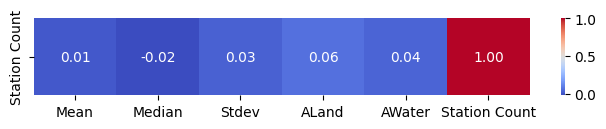

In [152]:
# Filter the dataframe
df_check = df[['Mean', 'Median', "Stdev", "ALand", "AWater", "Station Count"]]
df_check_filtered = df_check[df_check["Station Count"] > 10]
df_check_filtered = df_check_filtered[df_check["ALand"] > 0.5]
df_check_filtered = df_check_filtered[df_check["AWater"] > 0.5]

# Calculate correlation matrix
correlations = df_check_filtered.select_dtypes(include=['number']).corr()

# Extract the row for 'Station Count'
station_count_corr = correlations.loc['Station Count']
print("Correlation with Station Count:")
print(station_count_corr)

# Plot heatmap for 'Station Count' row
plt.figure(figsize=(8, 1))  # Adjust figure size for a single-row heatmap
sns.heatmap(station_count_corr.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
# plt.title('Correlation of Station Count with Other Features')
plt.show()


##Remove Outlieres - And EDA again

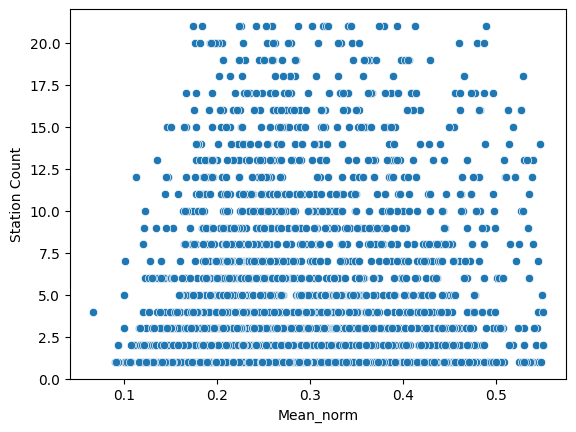

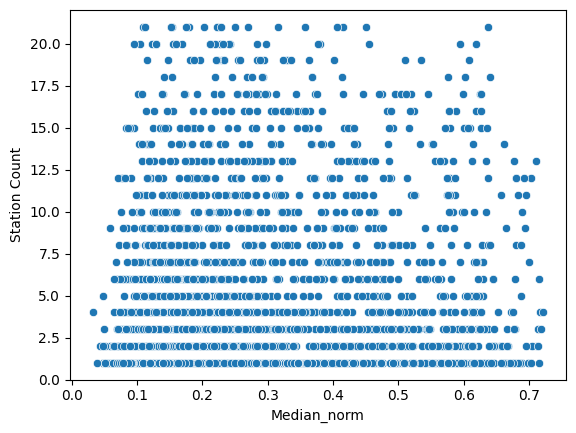

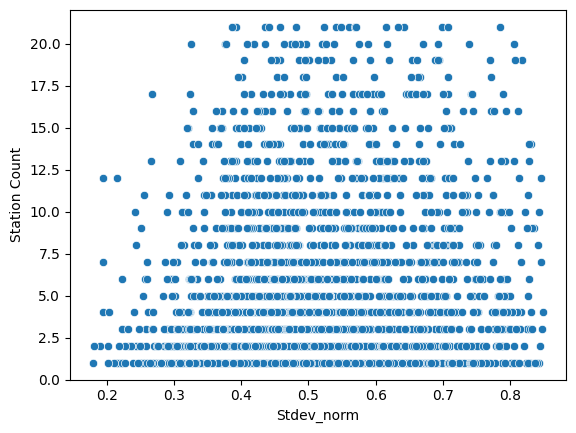

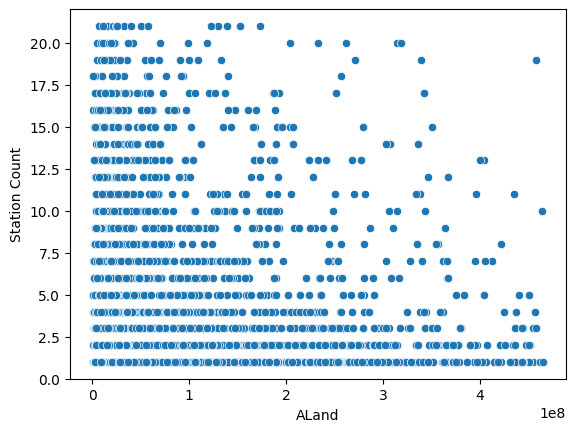

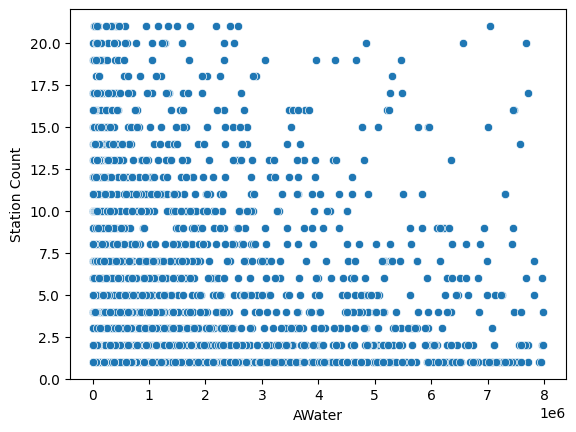

In [67]:
def remove_outliers_iqr(df, columns=None, multiplier=1.5):
    """
    Remove outliers from specified columns in a DataFrame based on the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.

    columns (list): List of column names to remove outliers from. If None, all numerical columns are used.
    multiplier (float): The multiplier for the IQR (default is 1.5).

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    # Select columns
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns

    # Create a copy to avoid modifying the original DataFrame
    df_filtered = df.copy()

    # Remove zero values
    for col in columns:
        df_filtered = df_filtered[df_filtered[col] > 0]

    # Remove outliers for each specified column
    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        df_filtered = df_filtered[
            (df_filtered[col] >= (Q1 - multiplier * IQR)) &
            (df_filtered[col] <= (Q3 + multiplier * IQR))
        ]

    return df_filtered

# Example usage
df_check_filtered = remove_outliers_iqr(df_check)
for i in df_check_filtered.select_dtypes(include=['number']).columns.drop("Station Count"):
    sns.scatterplot(x=df_check_filtered[i], y=df_check_filtered["Station Count"])
    plt.xlabel(i)
    plt.ylabel("Station Count")
    plt.show()


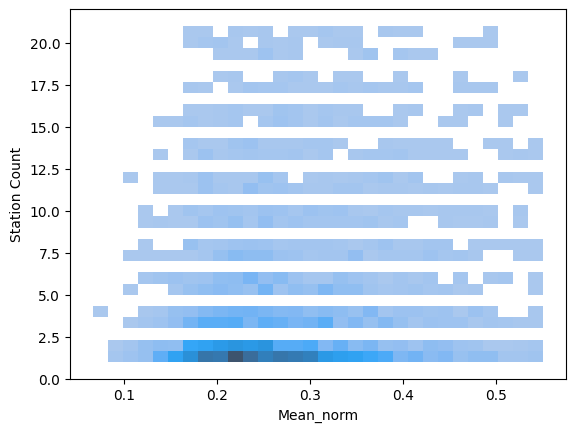

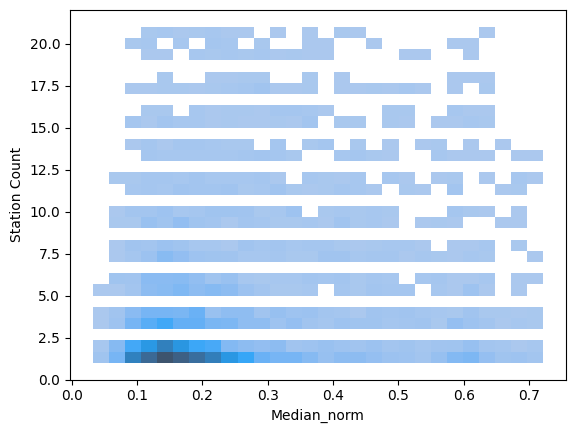

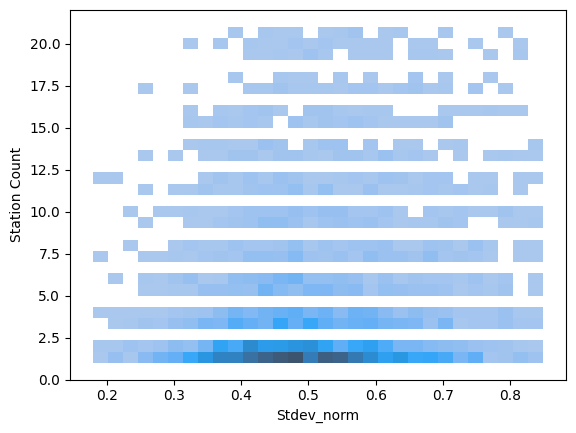

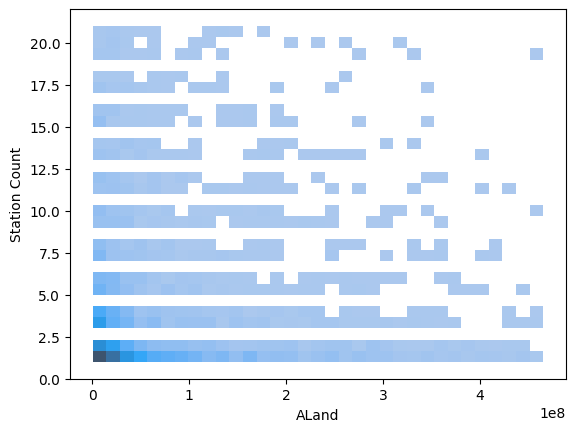

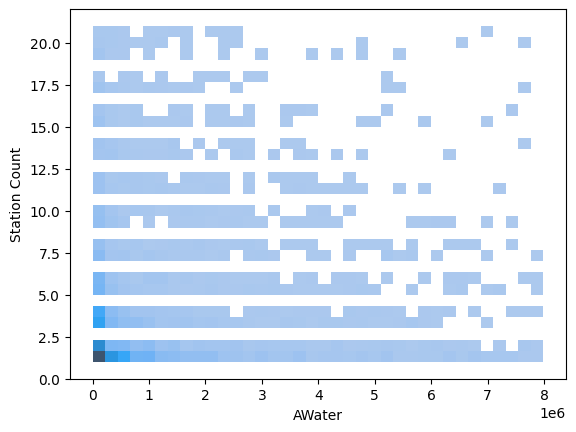

In [68]:
for i in df_check_filtered.select_dtypes(include=['number']).columns.drop("Station Count"):
    sns.histplot(x=df_check_filtered[i], y=df_check_filtered["Station Count"])
    plt.xlabel(i)
    plt.ylabel("Station Count")
    plt.show()


In [69]:
df_check_filtered.select_dtypes(include=['number']).corr()

,Mean_norm,Median_norm,Stdev_norm,ALand,AWater,Station Count
Mean_norm,1.000000,0.645937,0.870377,-0.219236,-0.033961,0.130714
Median_norm,0.645937,1.000000,0.457982,-0.112568,-0.012283,0.155201
Stdev_norm,0.870377,0.457982,1.000000,-0.201261,-0.015767,0.110410
ALand,-0.219236,-0.112568,-0.201261,1.000000,0.346401,-0.089662
AWater,-0.033961,-0.012283,-0.015767,0.346401,1.000000,-0.002882
Station Count,0.130714,0.155201,0.110410,-0.089662,-0.002882,1.000000


<Axes: >

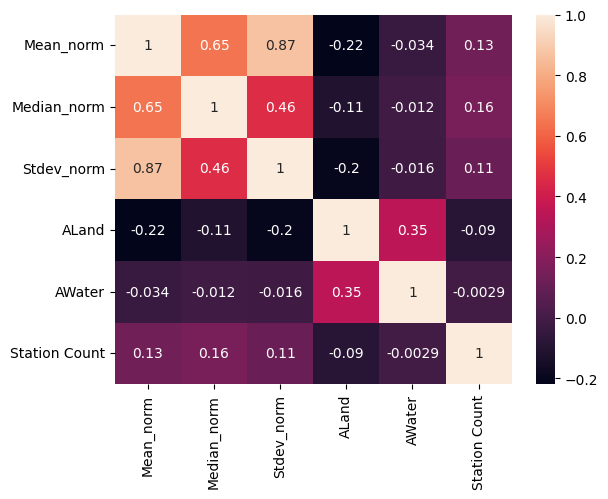

In [70]:
sns.heatmap(df_check_filtered.select_dtypes(include=['number']).corr(), annot=True)

# 3 - Analyze the Number of Stations Opened Over Time and Compare with Average Income


Use the "Open Date" to determine how many stations were opened each year.
Compare the yearly station openings with the average income ("Mean") of the cities where the stations are located.

In [71]:
df.shape

(5939, 26)

## Replace the nan Substring in Strings

We will treat the entire column as a string and replace any instance of nan with a placeholder value, such as '1900-01-01'.

In [72]:
def replace_nan_in_string(val):
    """
    Replace 'nan' in a string that represents a list with a placeholder value.
    """
    if isinstance(val, str):  # Ensure the value is a string
        # Replace 'nan' with the placeholder date
        return val.replace('nan', "'1900-01-01'")
    return val  # Return as-is if not a string

# Apply the function to the 'Open Date' column
df['Open Date'] = df['Open Date'].apply(replace_nan_in_string)


In [73]:
for col in ['Open Date']:
    print(f"After replacement, invalid rows in column {col}:")
    invalid_rows = df[~df[col].apply(lambda x: isinstance(x, list))]
    print(invalid_rows[[col]])
    print()


In [74]:
import ast

def safe_literal_eval(val):
    try:
        # Attempt to parse the string as a Python literal
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        # If parsing fails, return the value as-is
        return val

# Apply the safe parsing function to the list-like columns
list_columns = ['Station Name', 'Street Address', 'Open Date']
for col in list_columns:
    df[col] = df[col].apply(safe_literal_eval)


In [75]:
for col in list_columns:
    print(f"Column: {col}")
    print(df[col].head())
    print()

In [76]:
for col in ['Open Date']:
    print(f"After replacement, invalid rows in column {col}:")
    invalid_rows = df[~df[col].apply(lambda x: isinstance(x, list))]
    print(invalid_rows[[col]])
    print()


In [77]:
df.shape

(5939, 26)

In [78]:
# Explode the list-like columns
df_exploded = df.explode(['Open Date']).reset_index(drop=True)

In [79]:
df_exploded.shape

(41777, 26)

In [80]:
# Convert 'Open Date' to datetime
df_exploded['Open Date'] = pd.to_datetime(df_exploded['Open Date'], errors='coerce')

In [81]:
# Filter out rows with the placeholder date
df_valid_dates = df_exploded[df_exploded['Open Date'] != pd.Timestamp('1900-01-01')]

# Calculate Stations Opened Each Year
stations_per_year = df_valid_dates.groupby(df_valid_dates['Open Date'].dt.year).size().reset_index(name='Stations Opened')

In [82]:
# Ensure the Open Date is grouped by year for average income
income_per_year = df_valid_dates.groupby(df_valid_dates['Open Date'].dt.year)['Mean'].mean().reset_index(name='Average Income')

# Rename columns for consistency
stations_per_year = stations_per_year.rename(columns={'Open Date': 'Year'})
income_per_year = income_per_year.rename(columns={'Open Date': 'Year'})

# Merge station count and income data
yearly_data = pd.merge(stations_per_year, income_per_year, on='Year')
yearly_data = yearly_data.sort_values('Year')

# Display the merged data
print(yearly_data.head())

In [83]:
for y in yearly_data["Stations Opened"]:
    print(y)

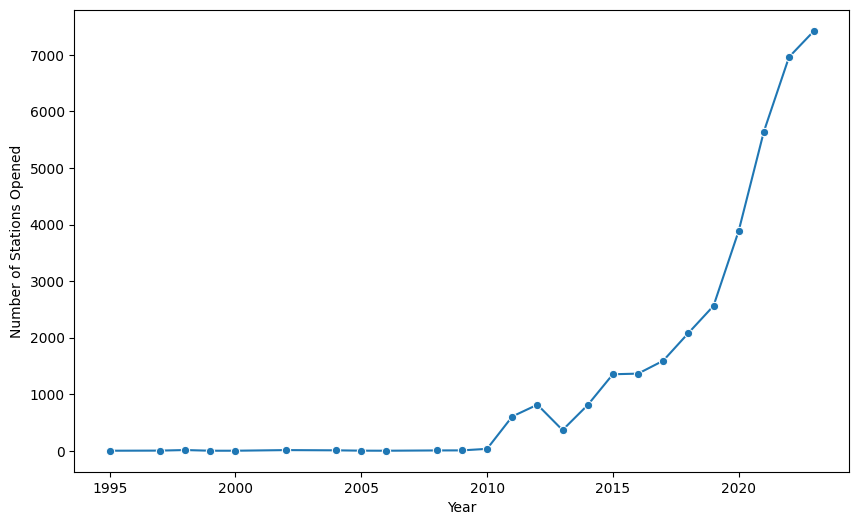

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data[:-1], x='Year', y='Stations Opened', marker='o')
# plt.title('Number of Stations Opened per Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations Opened')

# Save the plot as a PDF
plt.savefig("stations_opened_per_year.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

In [85]:
# Extract the year from 'Open Date'
df_exploded['Year'] = df_exploded['Open Date'].dt.year
df_exploded = df_exploded[df_exploded['Year'] != 1900]

# Group by 'State' and 'Year' to get the number of stations opened per state per year
stations_per_state_year = df_exploded.groupby(['State', 'Year']).size().reset_index(name='Stations Opened')

# Calculate mean income per state
mean_income_per_state = df.groupby('State')['Mean'].mean().reset_index(name='Mean Income')

# Merge the datasets
merged_data = pd.merge(stations_per_state_year, mean_income_per_state, on='State', how='left')

# Display the merged data
print(merged_data.head())


In [86]:
# Overall correlation
overall_correlation = merged_data['Mean Income'].corr(merged_data['Stations Opened'])
print(f"Overall Correlation between Mean Income and Stations Opened: {overall_correlation:.2f}")

# Correlation per year
corr_per_year = merged_data.groupby('Year').apply(
    lambda x: x['Mean Income'].corr(x['Stations Opened'])
).reset_index(name='Correlation')

print("\nCorrelation between Mean Income and Stations Opened per Year:")
print(corr_per_year)

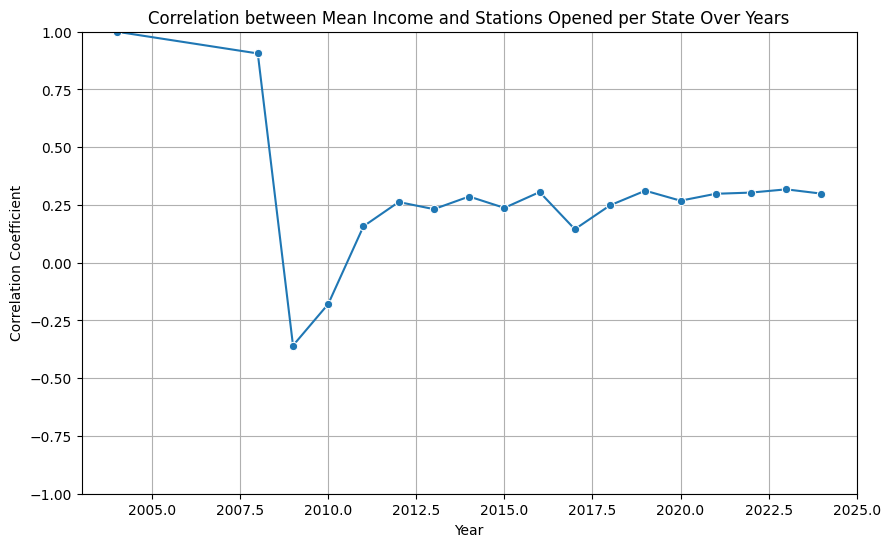

In [163]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=corr_per_year, x='Year', y='Correlation', marker='o')
plt.title('Correlation between Mean Income and Stations Opened per State Over Years')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.grid(True)
plt.show()

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data for modeling
X = merged_data[['Mean Income', 'Year']]
y = merged_data['Stations Opened']

# Handle missing values if any
X = X.dropna()
y = y.loc[X.index]

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Model evaluation
r2 = r2_score(y, y_pred)
print(f"R² Score of the model: {r2:.2f}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {dict(zip(['Mean Income', 'Year'], model.coef_))}")


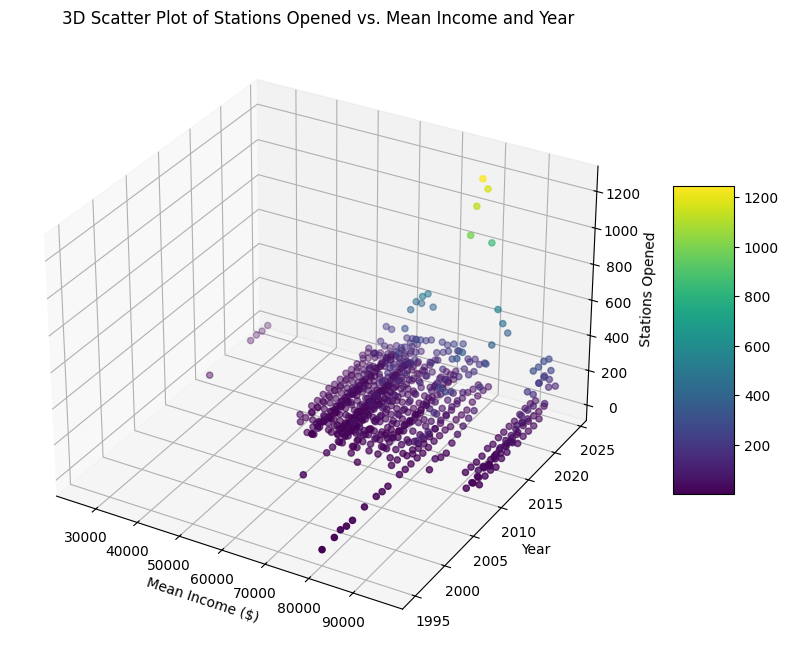

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    merged_data['Mean Income'],
    merged_data['Year'],
    merged_data['Stations Opened'],
    c=merged_data['Stations Opened'],
    cmap='viridis',
    depthshade=True
)
ax.set_xlabel('Mean Income ($)')
ax.set_ylabel('Year')
ax.set_zlabel('Stations Opened')
plt.title('3D Scatter Plot of Stations Opened vs. Mean Income and Year')
fig.colorbar(sc, shrink=0.5, aspect=5)
plt.show()


# 4 - Visualization of EV Charging Stations and Mean Income Across the USA

In [90]:
!pip install plotly
!pip install geopandas
!pip install geopy

In [91]:
import plotly.express as px
import plotly.graph_objects as go

In [118]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Miki/evc_income_merged.csv")
df.head()

,State,City_standardized,City_x,City_y,County,Place,Type,Primary,Zip_Code,ZIP,...,Station Count,Station Name,Street Address,Open Date,ALand,AWater,Mean,Median,Stdev,sum_w
0,AK,anch,Anchorage,Anchorage,"['Matanuska-Susitna Borough', 'Aleutians East ...","['Point MacKenzie', 'Akutan city']","['CDP', 'Track']","['place', 'Track']","[99501, 99508, 99504, 99517, 99507, 99503, 995...","[99515, 99501, 99514, 99517, 99503, '99515', 9...",...,13,"['JL Properties, Inc', 'CHUGACH NORTH STATION ...","['11124 Old Seward Hwy', '1040 E 1st Ave', 'Di...","['2020-06-26', '2020-08-11', '2020-10-01', '20...",597817212,283670760,89349.20,156128.440,55792.680,8544.513232
1,AK,chugiak,Chugiak,Chugiak,['Aleutians East Borough'],['Akutan city'],['Track'],['Track'],[99567],['99567'],...,1,"['Chugiak, AK - Tesla Supercharger']",['22211 Birchwood Loop Road'],['2022-11-05'],168793575,15079525,133300.00,300000.000,60207.000,72.760740
2,AK,delta junction,Delta Junction,Delta Junction,['Southeast Fairbanks Census Area'],['Whitestone'],['CDP'],['place'],[99737],[99737],...,1,['ReCharge Alaska - Delta Junction'],['265 Richardson Hwy'],['2024-01-17'],18298887,0,242857.00,300000.000,25317.000,0.866493
3,AK,fairbanks,Fairbanks,Fairbanks,"['Fairbanks North Star Borough', 'Aleutians Ea...","['Goldstream', 'Akutan city']","['CDP', 'Track']","['place', 'Track']","[99709, 99701]",[99701],...,1,['Golden Valley Electric Fairbanks'],['758 Illinois Street'],['2021-11-03'],11211476204,51065945,79965.25,177972.125,55464.125,3230.884702
4,AK,girdwood,Girdwood,GIRDWOOD,['Aleutians East Borough'],['Akutan city'],['Track'],['Track'],[99587],[99587],...,1,['VIP LOT CHARGER VIP LOT CHARGER'],['1000 ARLBERG AVE'],['2020-11-19'],1404917227,154085085,94928.00,300000.000,65593.000,100.227205


In [119]:
# Aggregate data per state
state_data = df.groupby('State').agg({
    'Station Count': 'sum',
    'Mean': 'mean',
    'Median': 'mean',
    'Stdev': 'mean',
    'ALand': 'sum',
    'AWater': 'sum',
}).reset_index()

state_data.head()


,State,Station Count,Mean,Median,Stdev,ALand,AWater
0,AK,46,93449.289286,130088.811786,51303.757500,26752101103,1709176236
1,AL,447,59836.828175,79671.477778,45898.836830,13084552278,449431246
2,AR,328,52362.314125,58818.775967,40219.646476,15462293034,284221392
3,AZ,1322,63841.375430,86317.434557,44316.191917,46500788547,110595596
4,CA,16918,80054.184328,103336.860636,54412.343373,74292229975,3467857083


In [120]:
# Define a capping threshold
cap_threshold = 4200  # Adjust this value based on your dataset and visualization needs

# Cap the Station Count
state_data['Station Count'] = state_data['Station Count'].apply(lambda x: min(x, cap_threshold))

# Optionally, add a new column to indicate if a value was capped
state_data['Capped'] = state_data['Station Count'].apply(lambda x: x == cap_threshold)

# Display the updated data
state_data.head()

,State,Station Count,Mean,Median,Stdev,ALand,AWater,Capped
0,AK,46,93449.289286,130088.811786,51303.757500,26752101103,1709176236,False
1,AL,447,59836.828175,79671.477778,45898.836830,13084552278,449431246,False
2,AR,328,52362.314125,58818.775967,40219.646476,15462293034,284221392,False
3,AZ,1322,63841.375430,86317.434557,44316.191917,46500788547,110595596,False
4,CA,4200,80054.184328,103336.860636,54412.343373,74292229975,3467857083,True


### State-Level Distribution of EV Charging Stations

In [154]:
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    state_data,
    locations='State',
    locationmode="USA-states",
    color='Station Count',
    scope="usa",
    color_continuous_scale="Blues",
    hover_name='State',
    labels={'Station Count': 'Number of Stations'}
)

# Update layout for better visuals
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa',
        lakecolor='lightblue',
    ),
    coloraxis_colorbar=dict(
        title="Stations",
        ticks="outside",
        x=1.01  # Moves the color bar closer to the map (default is 1.02)
    ),
    margin=dict(l=0, r=0, t=0, b=0)  # Removes extra white space around the figure
)

# Save the figure as a PDF
# fig.write_image("EV_Charging_Stations_by_State.pdf", format="pdf", width=800, height=600)

# Show the figure
fig.show()


### Mean Household Income Per State

In [155]:
# Plotting the mean income per state using a choropleth map
fig = px.choropleth(
    state_data,
    locations='State',
    locationmode="USA-states",
    color='Mean',
    scope="usa",
    color_continuous_scale="Greens",
    labels={'Mean':'Mean Household Income'},
    # title='Mean Household Income per State'
)
# Update layout for better visuals
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa',
        lakecolor='lightblue',
    ),
    coloraxis_colorbar=dict(
        title="Stations",
        ticks="outside",
        x=1.01  # Moves the color bar closer to the map (default is 1.02)
    ),
    margin=dict(l=0, r=0, t=0, b=0)  # Removes extra white space around the figure
)

fig.show()


In [123]:
# Ensure ALand column exists and has no zero values to avoid division by zero
state_data = state_data[state_data['ALand'] > 0]

# Normalize Station Count and Mean by ALand
state_data['Station Count per Unit Area'] = (100000 * state_data['Station Count']) / state_data['ALand']

# Display the updated DataFrame
state_data.head()


,State,Station Count,Mean,Median,Stdev,ALand,AWater,Capped,Station Count per Unit Area
0,AK,46,93449.289286,130088.811786,51303.757500,26752101103,1709176236,False,0.000172
1,AL,447,59836.828175,79671.477778,45898.836830,13084552278,449431246,False,0.003416
2,AR,328,52362.314125,58818.775967,40219.646476,15462293034,284221392,False,0.002121
3,AZ,1322,63841.375430,86317.434557,44316.191917,46500788547,110595596,False,0.002843
4,CA,4200,80054.184328,103336.860636,54412.343373,74292229975,3467857083,True,0.005653


###  Geospatial Correlation Between EV Charging Stations and Household Income

In [156]:
import plotly.express as px

# Ensure the data is prepared
state_data['Bubble Size'] = state_data['Station Count']  # You can normalize this if needed
state_data['Bubble Color'] = state_data['Mean']  # Use Mean for coloring

# Create the scatter geo plot
fig = px.scatter_geo(
    state_data,
    locations='State',  # State abbreviations
    locationmode='USA-states',  # Map mode
    size='Bubble Size',  # Size represents the station count
    color='Bubble Color',  # Color represents mean income
    scope='usa',  # Limit to USA map
    # title='Correlation Between EV Charging Stations and Household Income',
    hover_name='State',  # Show state names on hover
    hover_data={
        'Bubble Size': True,  # Show the size of the bubbles
        'Bubble Color': True  # Show the mean income
    },
    labels={'Bubble Size': 'Station Count', 'Bubble Color': 'Mean Income'},
    color_continuous_scale='Viridis'  # Color scale for mean income
)

# Update layout for better visuals
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa',
        lakecolor='lightblue',
    ),
    coloraxis_colorbar=dict(
        title="Stations",
        ticks="outside",
        x=1.01  # Moves the color bar closer to the map (default is 1.02)
    ),
    margin=dict(l=0, r=0, t=0, b=0)  # Removes extra white space around the figure
)

fig.show()


In [125]:
state_populations = {
    'AL': 5101000,
    'AK': 733000,
    'AZ': 7359000,
    'AR': 3050000,
    'CA': 38940000,
    'CO': 5812000,
    'CT': 3605000,
    'DE': 1018000,
    'DC': 712000,
    'FL': 23000000,
    'GA': 10912000,
    'HI': 1440000,
    'ID': 1939000,
    'IL': 12550000,
    'IN': 6833000,
    'IA': 3179000,
    'KS': 2937000,
    'KY': 4512000,
    'LA': 4590000,
    'ME': 1385000,
    'MD': 6165000,
    'MA': 7126000,
    'MI': 10034000,
    'MN': 5717000,
    'MS': 2940000,
    'MO': 6188000,
    'MT': 1143000,
    'NE': 1988000,
    'NV': 3177000,
    'NH': 1402000,
    'NJ': 9261000,
    'NM': 2113000,
    'NY': 19677000,
    'NC': 10711000,
    'ND': 780000,
    'OH': 11780000,
    'OK': 4021000,
    'OR': 4241000,
    'PA': 12972000,
    'PR': 3193694,
    'RI': 1110000,
    'SC': 5282000,
    'SD': 909000,
    'TN': 7051000,
    'TX': 30503000,
    'UT': 3380000,
    'VT': 647000,
    'VA': 8683000,
    'WA': 7951000,
    'WV': 1755000,
    'WI': 5892000,
    'WY': 581000
}


In [126]:
# Assuming 'state_data' is your DataFrame containing 'State' and 'Station Count' columns

# Add the population data to the DataFrame
state_data['Population'] = state_data['State'].map(state_populations)

# Display the updated data
print(state_data.head())

In [127]:
state_data.isnull().sum()

,0
State,0
Station Count,0
Mean,0
Median,0
Stdev,0
ALand,0
AWater,0
Capped,0
Station Count per Unit Area,0
Bubble Size,0


In [128]:
missing_population_states = state_data[state_data['Population'].isnull()]['State']
print("States with missing Population data:", missing_population_states.tolist())

#### Normalized EV Charging Stations by Population

In [161]:
import plotly.express as px

# Ensure the data is prepared
state_data['Bubble Size'] = state_data['Station Count'] / state_data['Population']
state_data['Bubble Color'] = state_data['Mean']  # Use Mean for coloring

# Create the scatter geo plot
fig = px.scatter_geo(
    state_data,
    locations='State',  # State abbreviations
    locationmode='USA-states',  # Map mode
    size='Bubble Size',  # Size represents the station count
    color='Bubble Color',  # Color represents mean income
    scope='usa',  # Limit to USA map
    # title='Correlation Between Household Income and a normalized EV Charging Stations by Population',
    hover_name='State',  # Show state names on hover
    hover_data={
        'Bubble Size': True,  # Show the size of the bubbles
        'Bubble Color': True  # Show the mean income
    },
    labels={'Bubble Size': 'Station Count', 'Bubble Color': 'Mean Income'},
    color_continuous_scale='Viridis'  # Color scale for mean income
)

# Update layout for better visuals
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa',
        lakecolor='lightblue',
    ),
    coloraxis_colorbar=dict(
        title="Stations",
        ticks="outside",
        x=1.01  # Moves the color bar closer to the map (default is 1.02)
    ),
    margin=dict(l=0, r=0, t=0, b=0)  # Removes extra white space around the figure
)

fig.show()


#### Normalized EV Charging Stations by Land Area

In [160]:
import plotly.express as px

# Ensure the data is prepared
state_data['Bubble Size'] = state_data['Station Count'] / state_data['ALand']   # You can normalize this if needed
state_data['Bubble Color'] = state_data['Mean']  # Use Mean for coloring

# Create the scatter geo plot
fig = px.scatter_geo(
    state_data,
    locations='State',  # State abbreviations
    locationmode='USA-states',  # Map mode
    size='Bubble Size',  # Size represents the station count
    color='Bubble Color',  # Color represents mean income
    scope='usa',  # Limit to USA map
    # title='Correlation Between Household Income and a normalized EV Charging Stations by The Land Area',
    hover_name='State',  # Show state names on hover
    hover_data={
        'Bubble Size': True,  # Show the size of the bubbles
        'Bubble Color': True  # Show the mean income
    },
    labels={'Bubble Size': 'Station Count', 'Bubble Color': 'Mean Income'},
    color_continuous_scale='Viridis'  # Color scale for mean income
)

# Update layout for better visuals
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa',
        lakecolor='lightblue',
    ),
    coloraxis_colorbar=dict(
        title="Stations",
        ticks="outside",
        x=1.01  # Moves the color bar closer to the map (default is 1.02)
    ),
    margin=dict(l=0, r=0, t=0, b=0)  # Removes extra white space around the figure
)

fig.show()


In [159]:
import plotly.express as px

# Ensure the data is prepared
state_data['Bubble Size'] = state_data['Station Count'] / (state_data['Population'] + state_data['ALand'])   # You can normalize this if needed
state_data['Bubble Color'] = state_data['Mean']  # Use Mean for coloring

# Create the scatter geo plot
fig = px.scatter_geo(
    state_data,
    locations='State',  # State abbreviations
    locationmode='USA-states',  # Map mode
    size='Bubble Size',  # Size represents the station count
    color='Bubble Color',  # Color represents mean income
    scope='usa',  # Limit to USA map
    # title='Correlation Between Household Income and a normalized EV Charging Stations by The Land Area + Population',
    hover_name='State',  # Show state names on hover
    hover_data={
        'Bubble Size': True,  # Show the size of the bubbles
        'Bubble Color': True  # Show the mean income
    },
    labels={'Bubble Size': 'Station Count', 'Bubble Color': 'Mean Income'},
    color_continuous_scale='Viridis'  # Color scale for mean income
)

# Update layout for better visuals
# Update layout for better visuals
fig.update_layout(
    title_font_size=20,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa',
        lakecolor='lightblue',
    ),
    coloraxis_colorbar=dict(
        title="Stations",
        ticks="outside",
        x=1.01  # Moves the color bar closer to the map (default is 1.02)
    ),
    margin=dict(l=0, r=0, t=0, b=0)  # Removes extra white space around the figure
)
fig.show()


In [132]:
import plotly.express as px

# Add population data to state_data
state_data['Population'] = state_data['State'].map(state_populations)

# Create scatter plot
fig = px.scatter(
    state_data,
    x='Population',
    y='Station Count',
    text='State',
    labels={'Population': 'Population', 'Station Count': 'Number of Stations'},
    title='Population vs. Number of EV Charging Stations',
    trendline='ols'  # Add a trendline for correlation analysis
)

fig.update_traces(marker=dict(size=10, color='blue', opacity=0.7))

fig.show()


In [133]:
# Calculate correlation
correlation = state_data['Population'].corr(state_data['Station Count'])
print(f"Correlation between Population and Station Count: {correlation:.2f}")

In [134]:
fig = px.scatter(
    state_data,
    x='Population',
    y='Station Count',
    text='State',
    color='Mean',  # Color by mean income
    labels={
        'Population': 'Population',
        'Station Count': 'Number of Stations',
        'Mean': 'Mean Income ($)'
    },
    # title='Population vs. Number of EV Charging Stations (Colored by Mean Income)',
    trendline='ols',
    color_continuous_scale='Viridis'  # Choose a suitable color scale
)

fig.update_traces(marker=dict(size=20, opacity=0.7))
fig.show()


In [135]:
state_data.head(2)

,State,Station Count,Mean,Median,Stdev,ALand,AWater,Capped,Station Count per Unit Area,Bubble Size,Bubble Color,Population
0,AK,46,93449.289286,130088.811786,51303.75750,26752101103,1709176236,False,0.000172,1.719444e-09,93449.289286,733000
1,AL,447,59836.828175,79671.477778,45898.83683,13084552278,449431246,False,0.003416,3.414911e-08,59836.828175,5101000


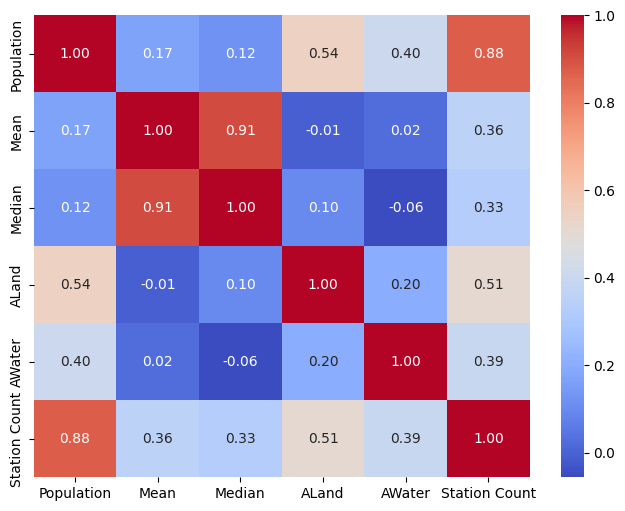

In [136]:

correlations = state_data[['Population', 'Mean','Median', 'ALand','AWater', 'Station Count']].corr()
print("Correlation Matrix:")
print(correlations)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Between Population, Station Count, and Mean Income')
plt.show()



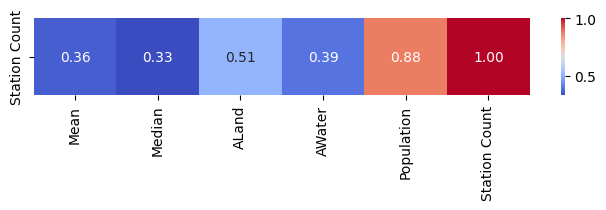

In [151]:
# Calculate correlation matrix
correlations = state_data[['Mean', 'Median', 'ALand', 'AWater', 'Population','Station Count']].corr()

# Extract the row for 'Station Count'
station_count_corr = correlations.loc['Station Count']
print("Correlation with Station Count:")
print(station_count_corr)

# Plot heatmap for 'Station Count' row
plt.figure(figsize=(8, 1))  # Adjust figure size for a single-row heatmap
sns.heatmap(station_count_corr.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
# plt.title('Correlation of Station Count with Other Features')
plt.show()
